In [43]:
# imports
from scipy.cluster.hierarchy import linkage, dendrogram
import pandas as pd
from sklearn.metrics import adjusted_rand_score
from matplotlib import pyplot as p
# from sklearn.cluster import DBSCANlt

In [2]:
# load the datasets d_10c data
d_10c = pd.read_csv('2d-10c.dat', header=None)

In [3]:
# load oreder2-3clust data
order2_3clust = pd.read_csv('order2-3clust.csv', header=None) 

In [4]:
# load iris data
iris = pd.read_csv('iris.csv', header=None)

In [5]:
# load long data
long_data = pd.read_csv('long.data.txt', header=None, sep=' ')

In [6]:
smile = pd.read_csv('smile.csv', header=None)

In [7]:
# load square data
square_data = pd.read_csv('square.data.txt', header=None, sep=' ')

In [8]:
clusters = {
    'd_10c': [],
    'order2_3clust': [],
    'iris': [],
    'long_data': [],
    'smile': [],
    'square_data': []
}


In [ ]:
classes = {
    'd_10c': 10,
    'order2_3clust': 3,
    'iris': 3,
    'long_data': 2,
    'smile': 4,
    'square_data': 4
}

In [38]:
datasets_classes = {
    #last column
    'd_10c' : d_10c.iloc[:, -1],
    'order2_3clust' : order2_3clust.iloc[:, -1],
    'iris' : iris.iloc[:, -1],
    'long_data' : long_data.iloc[:, -1],
    'smile' : smile.iloc[:, -1],
    'square_data' : square_data.iloc[:, -1]
}

In [39]:
datasets = {
    #all columns except last
    'd_10c': d_10c.iloc[:, :-1],
    'order2_3clust': order2_3clust.iloc[:, :-1],
    'iris': iris.iloc[:, :-1],
    'long_data': long_data.iloc[:, :-1],
    'smile': smile.iloc[:, :-1],
    'square_data': square_data.iloc[:, :-1]
}

## Task 1

# Single-linkage

d_10c


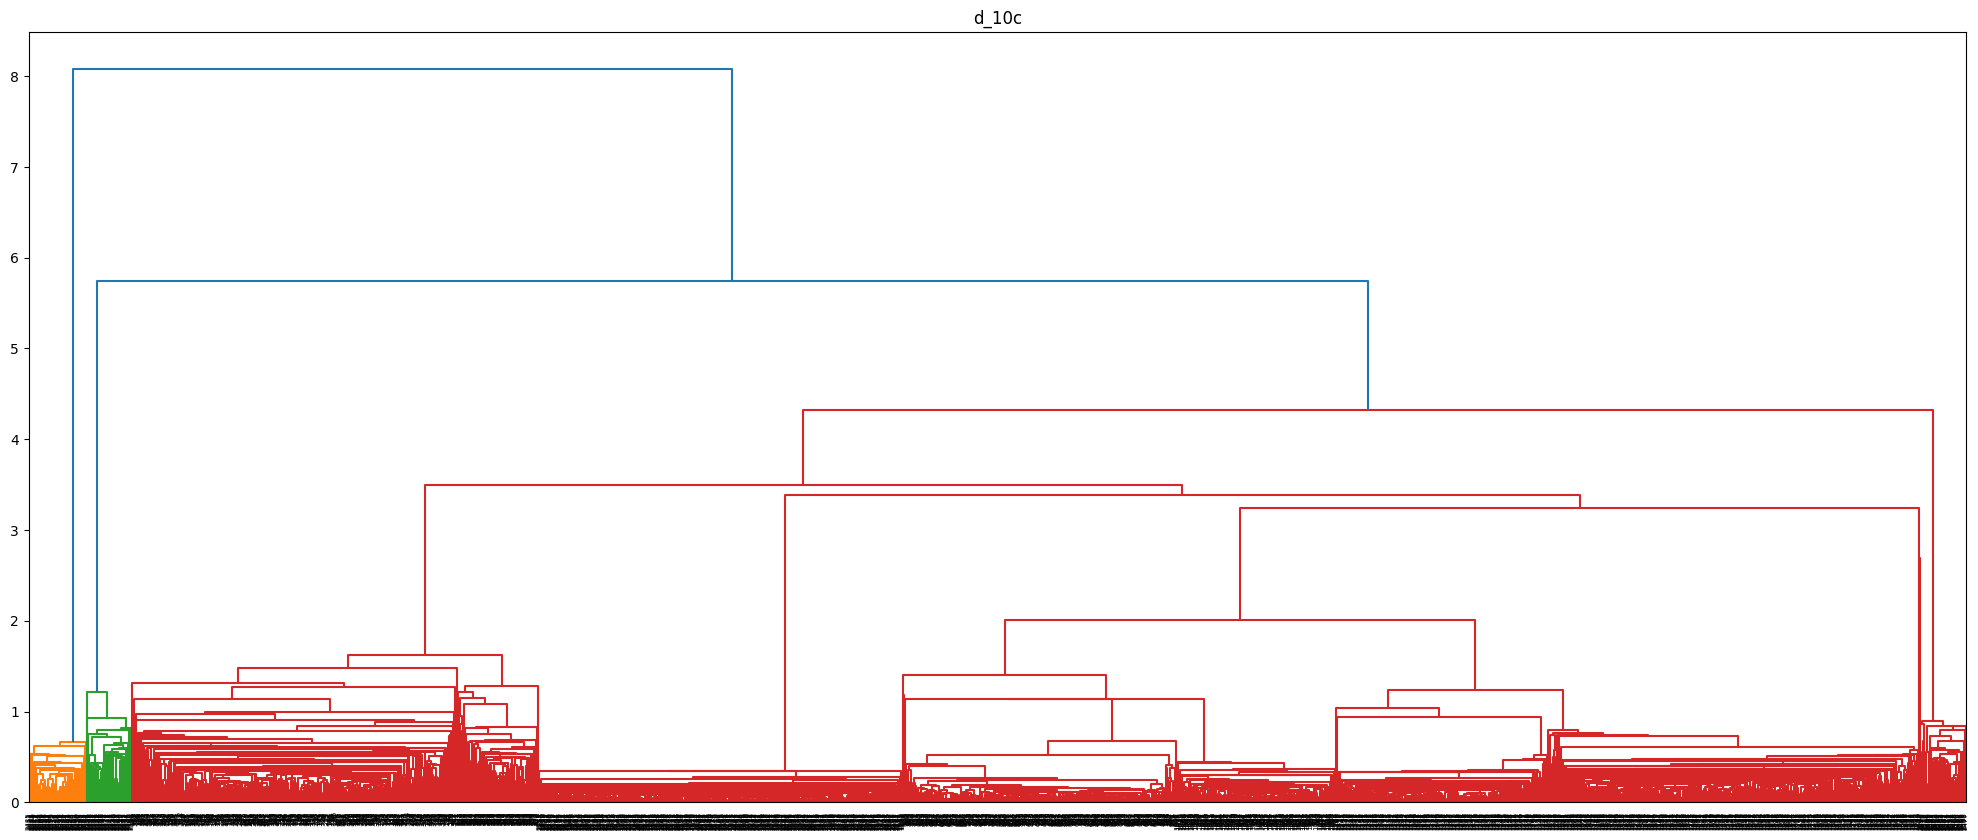

order2_3clust


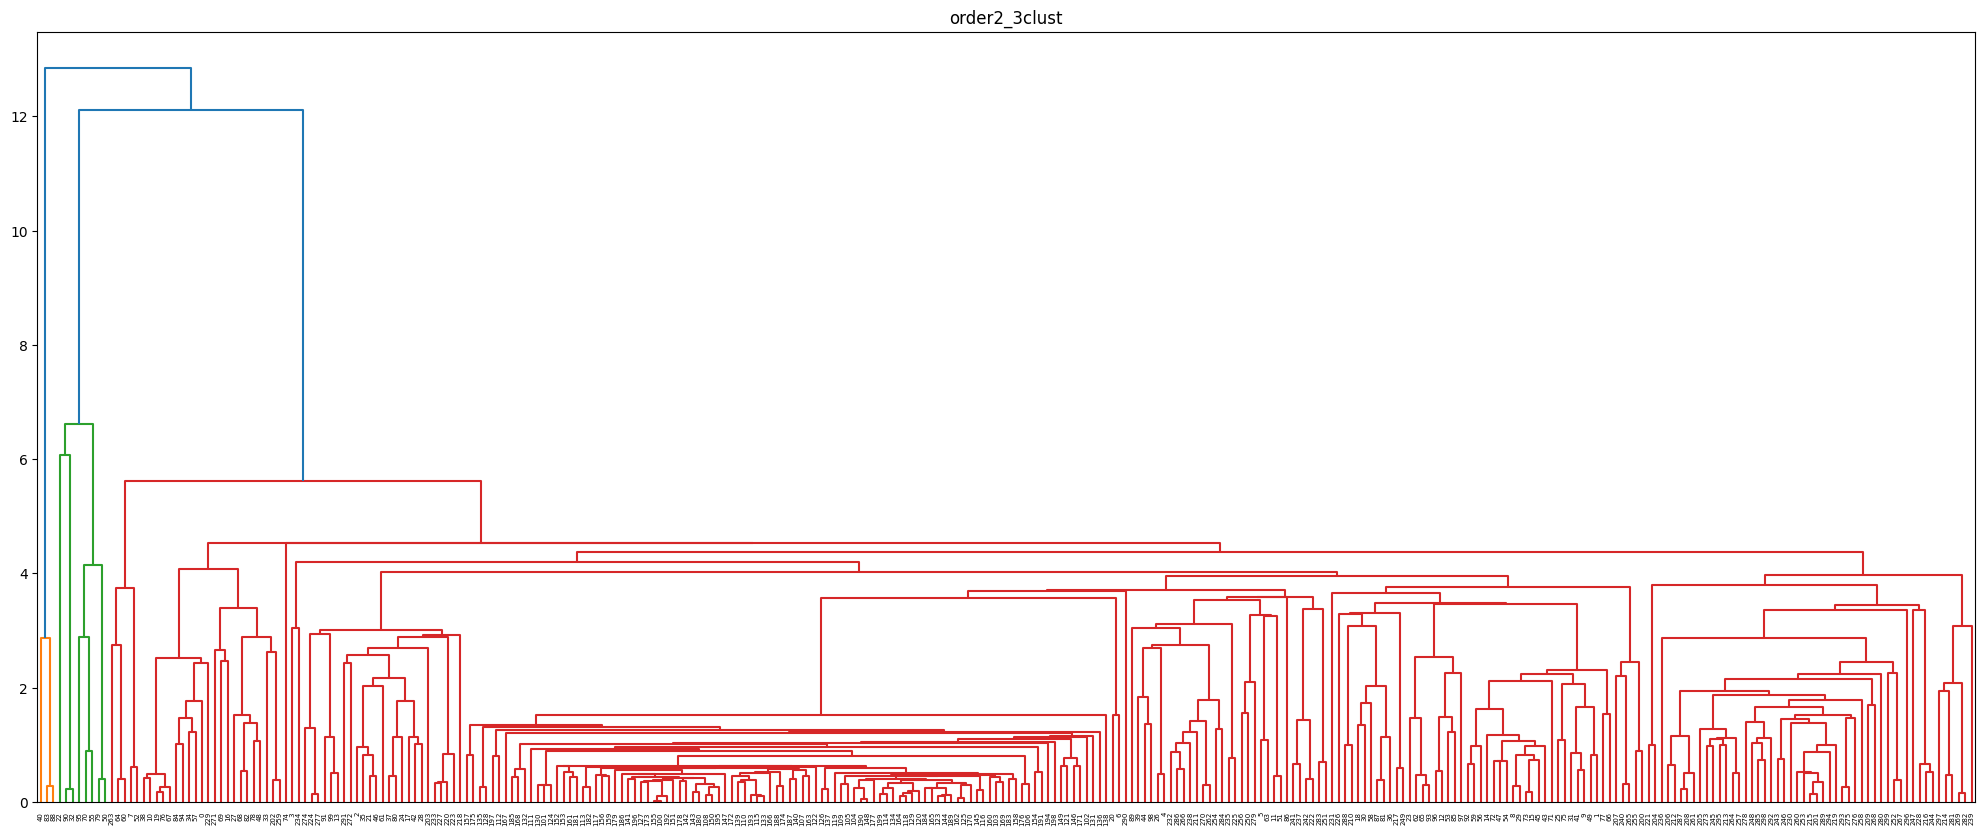

iris


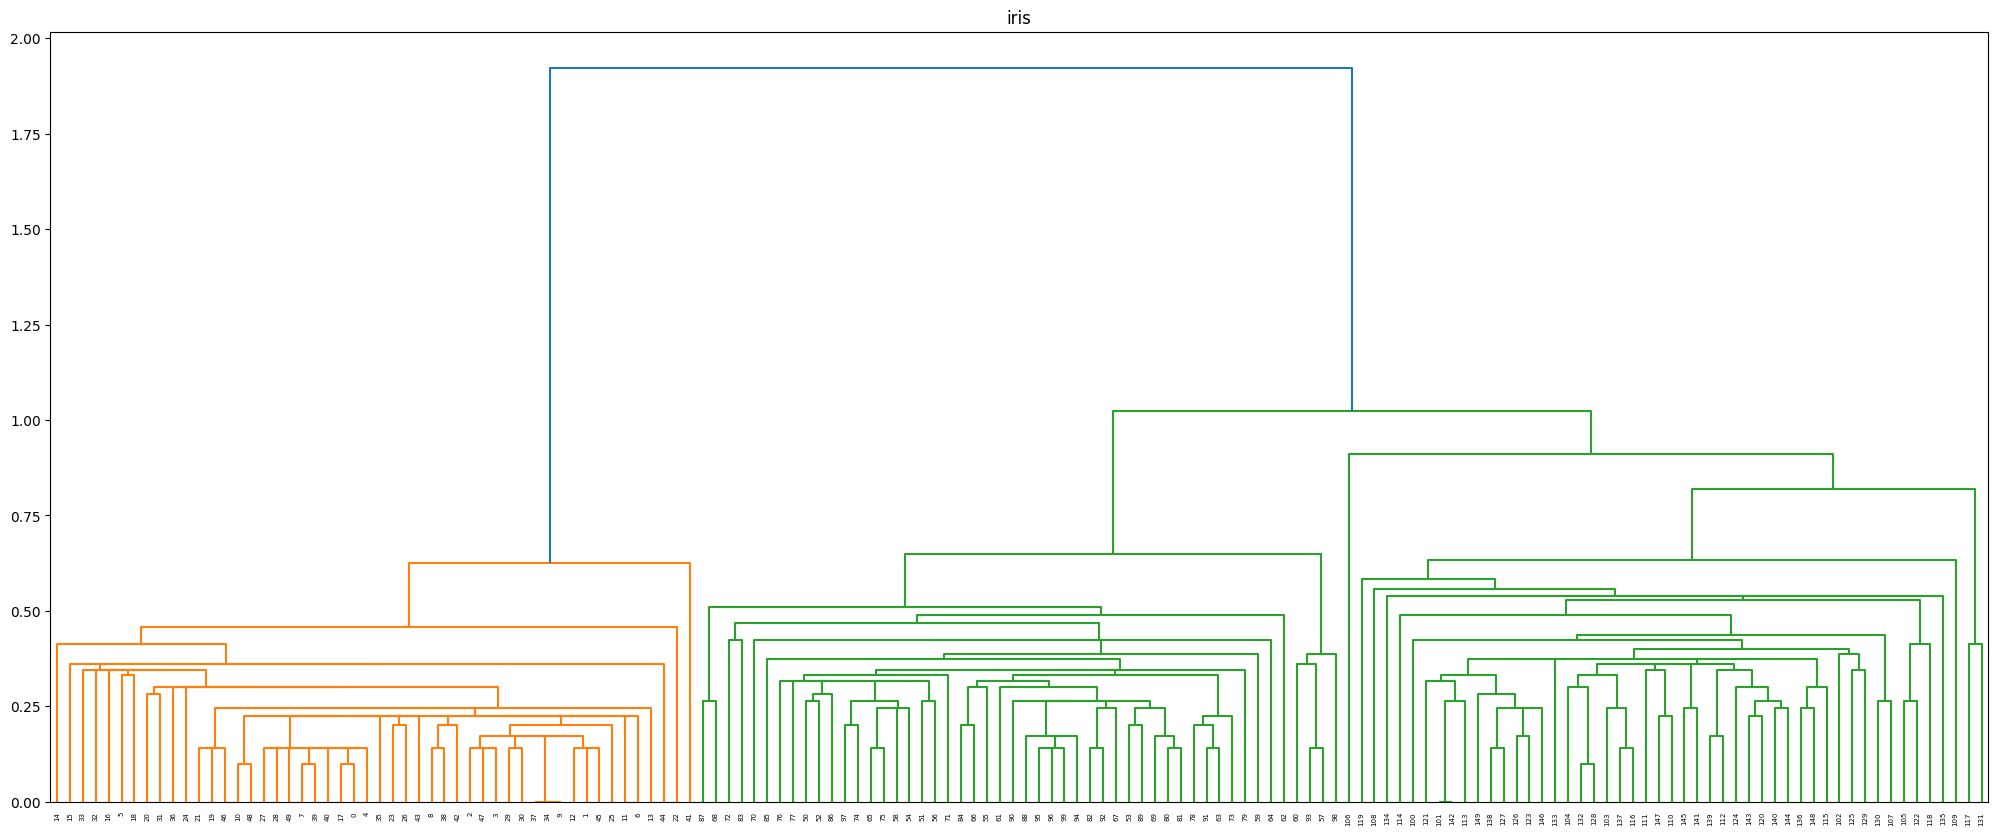

long_data


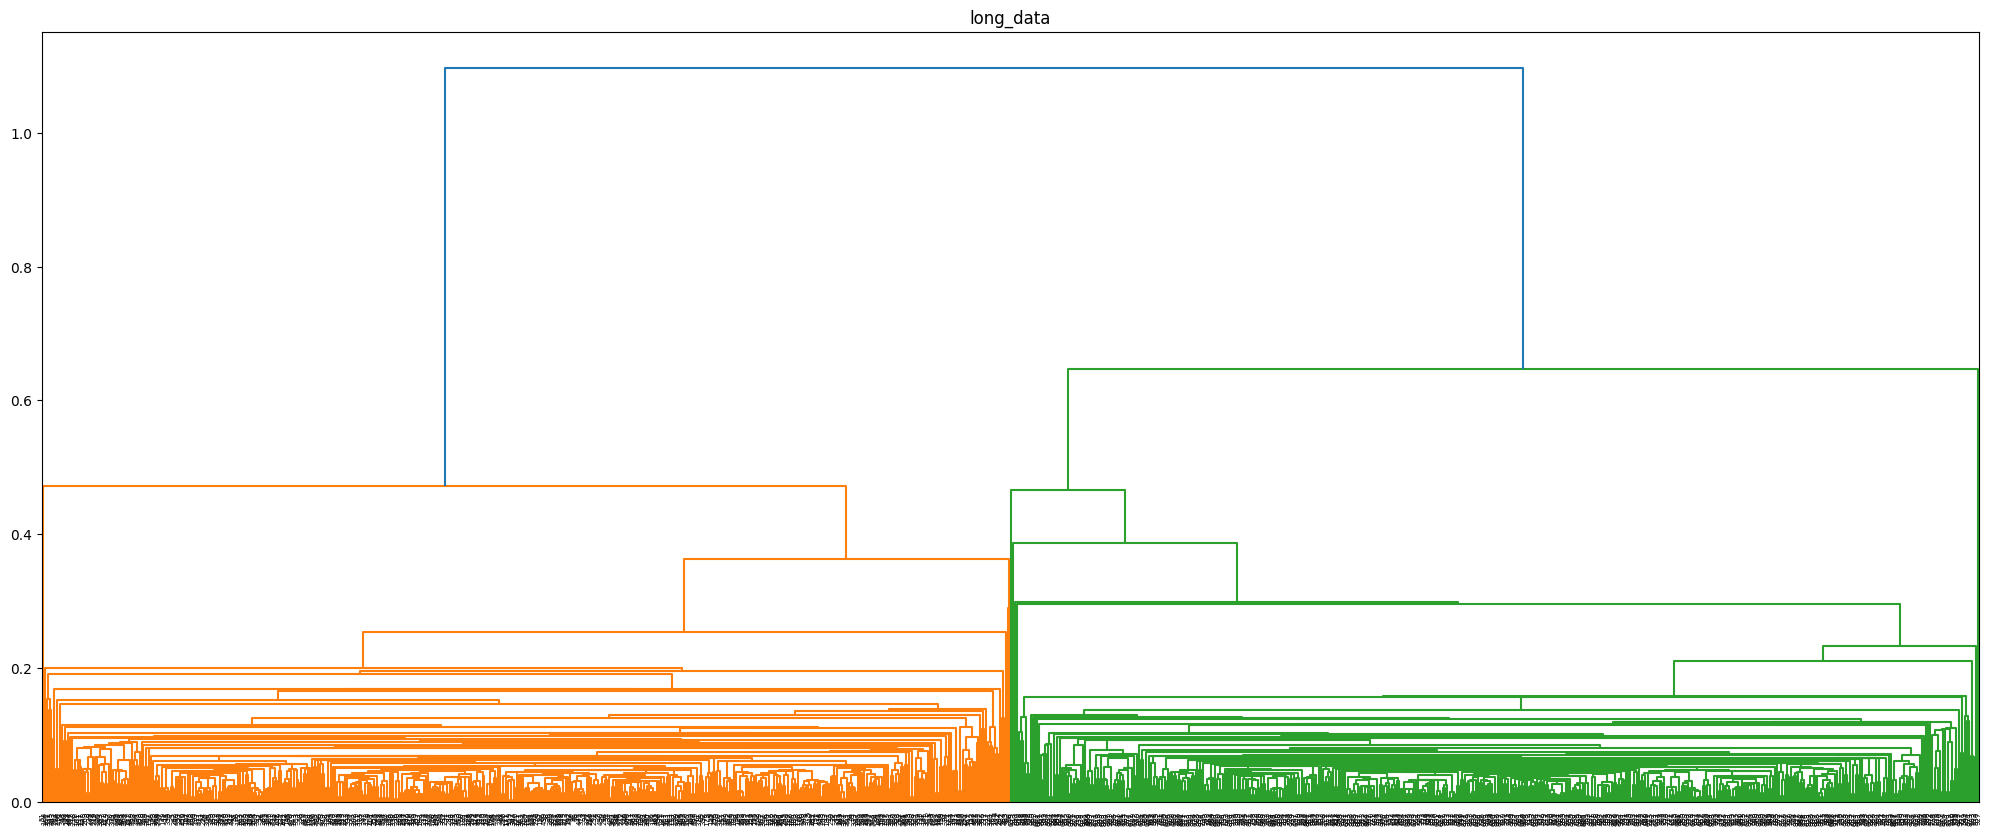

smile


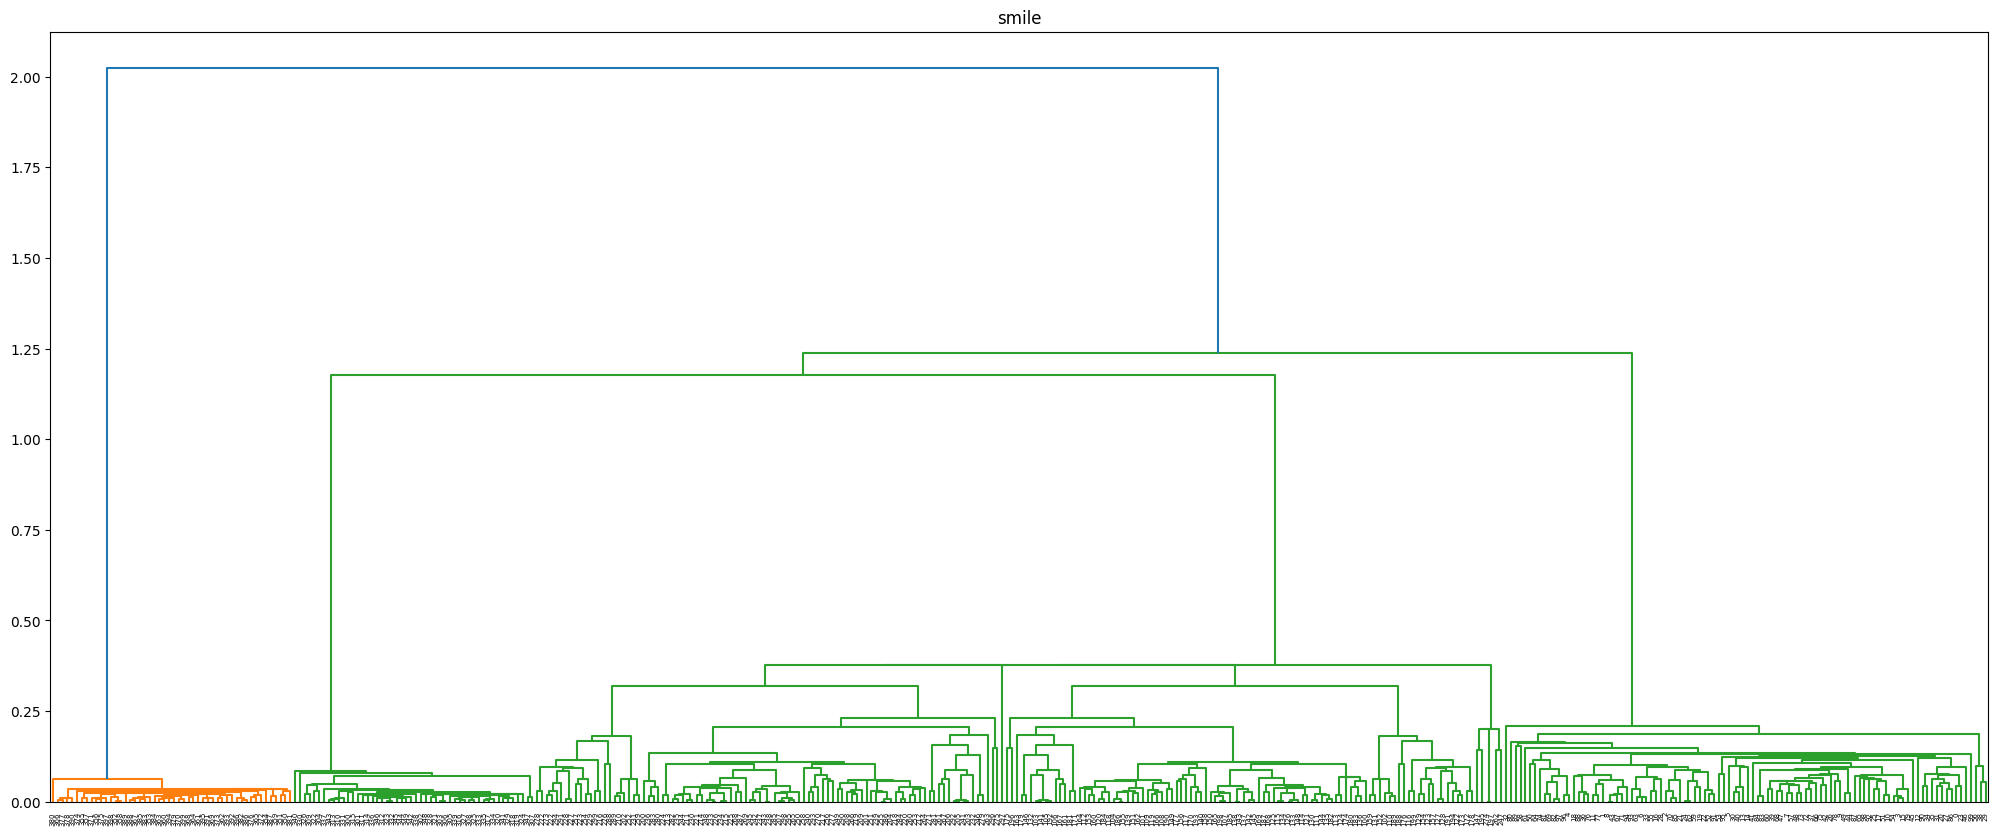

square_data


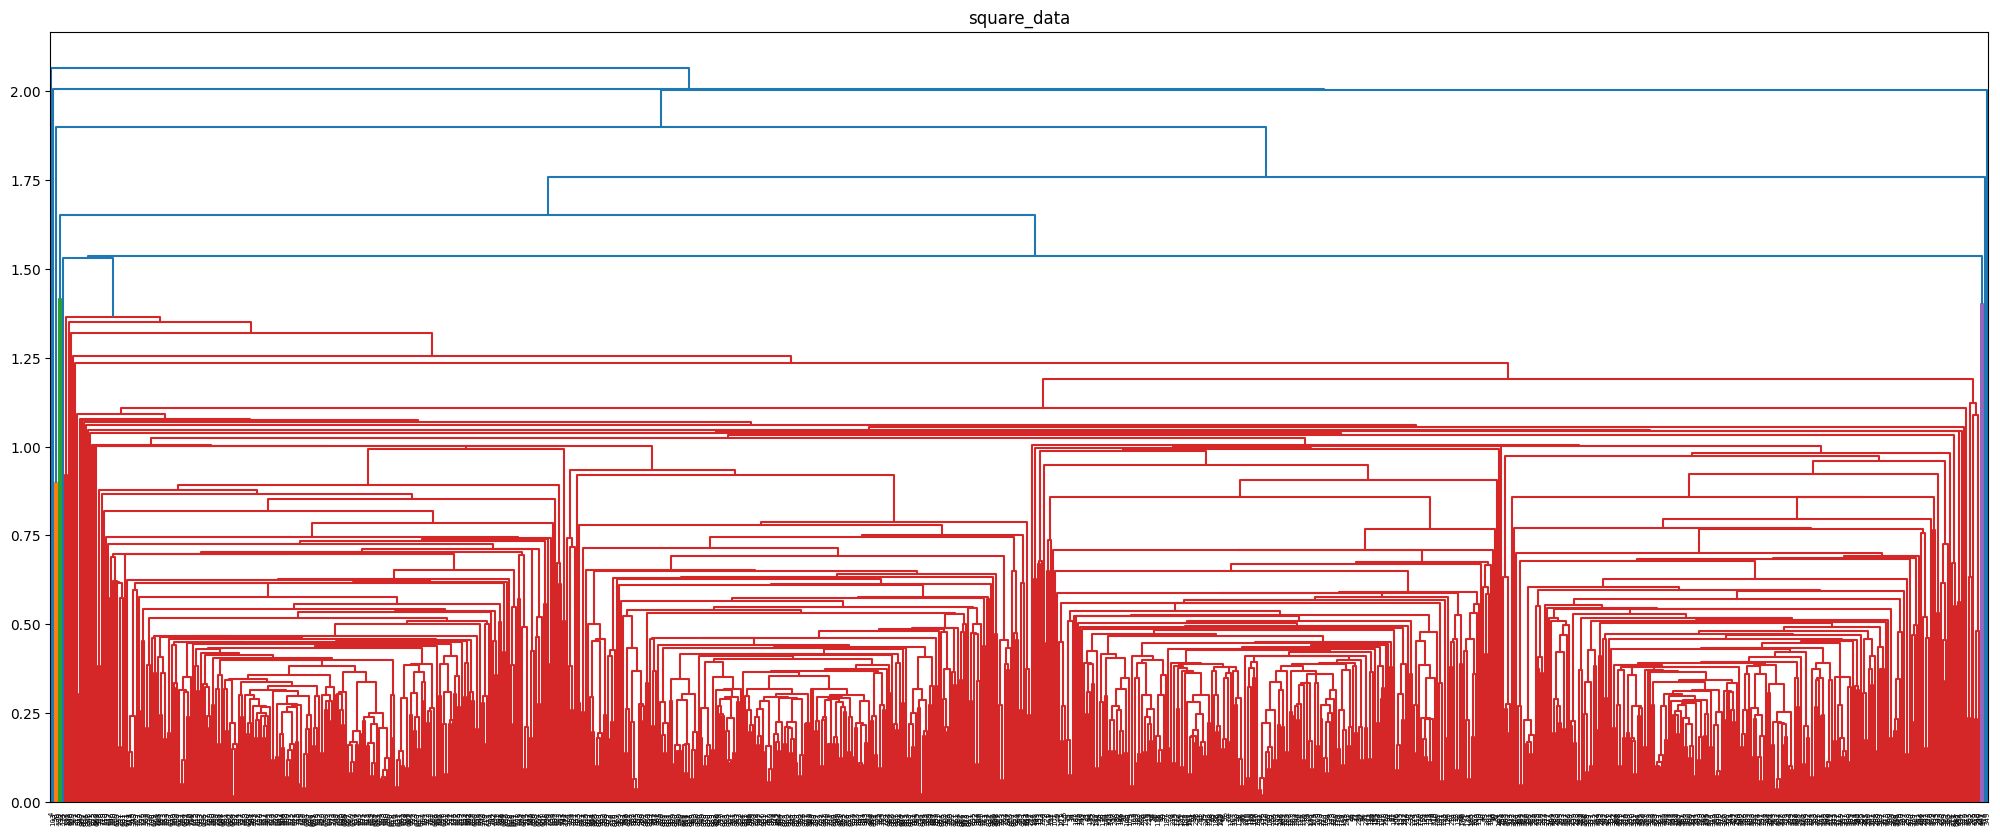

In [47]:
for key in datasets:
    print(key)
    fig = plt.figure(figsize=(25, 10))
    dendrogram(linkage(datasets[key], method='single', metric='euclidean', optimal_ordering=True))
    plt.title(key)
    plt.show()

# Average linkage

d_10c


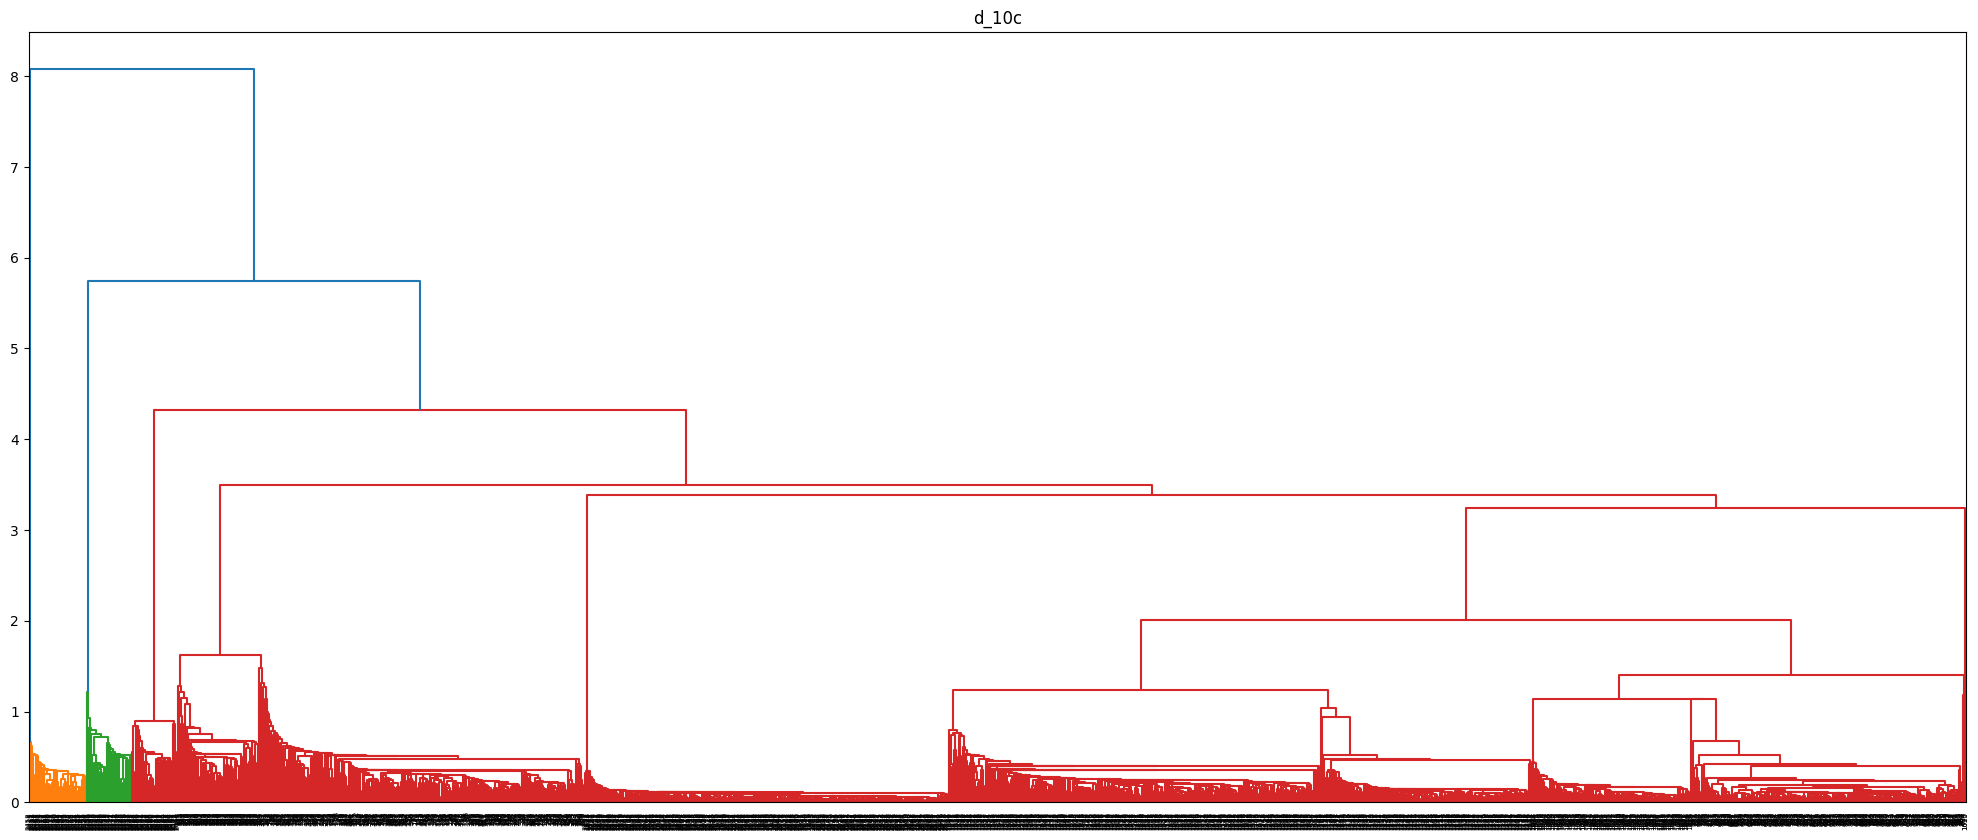

order2_3clust


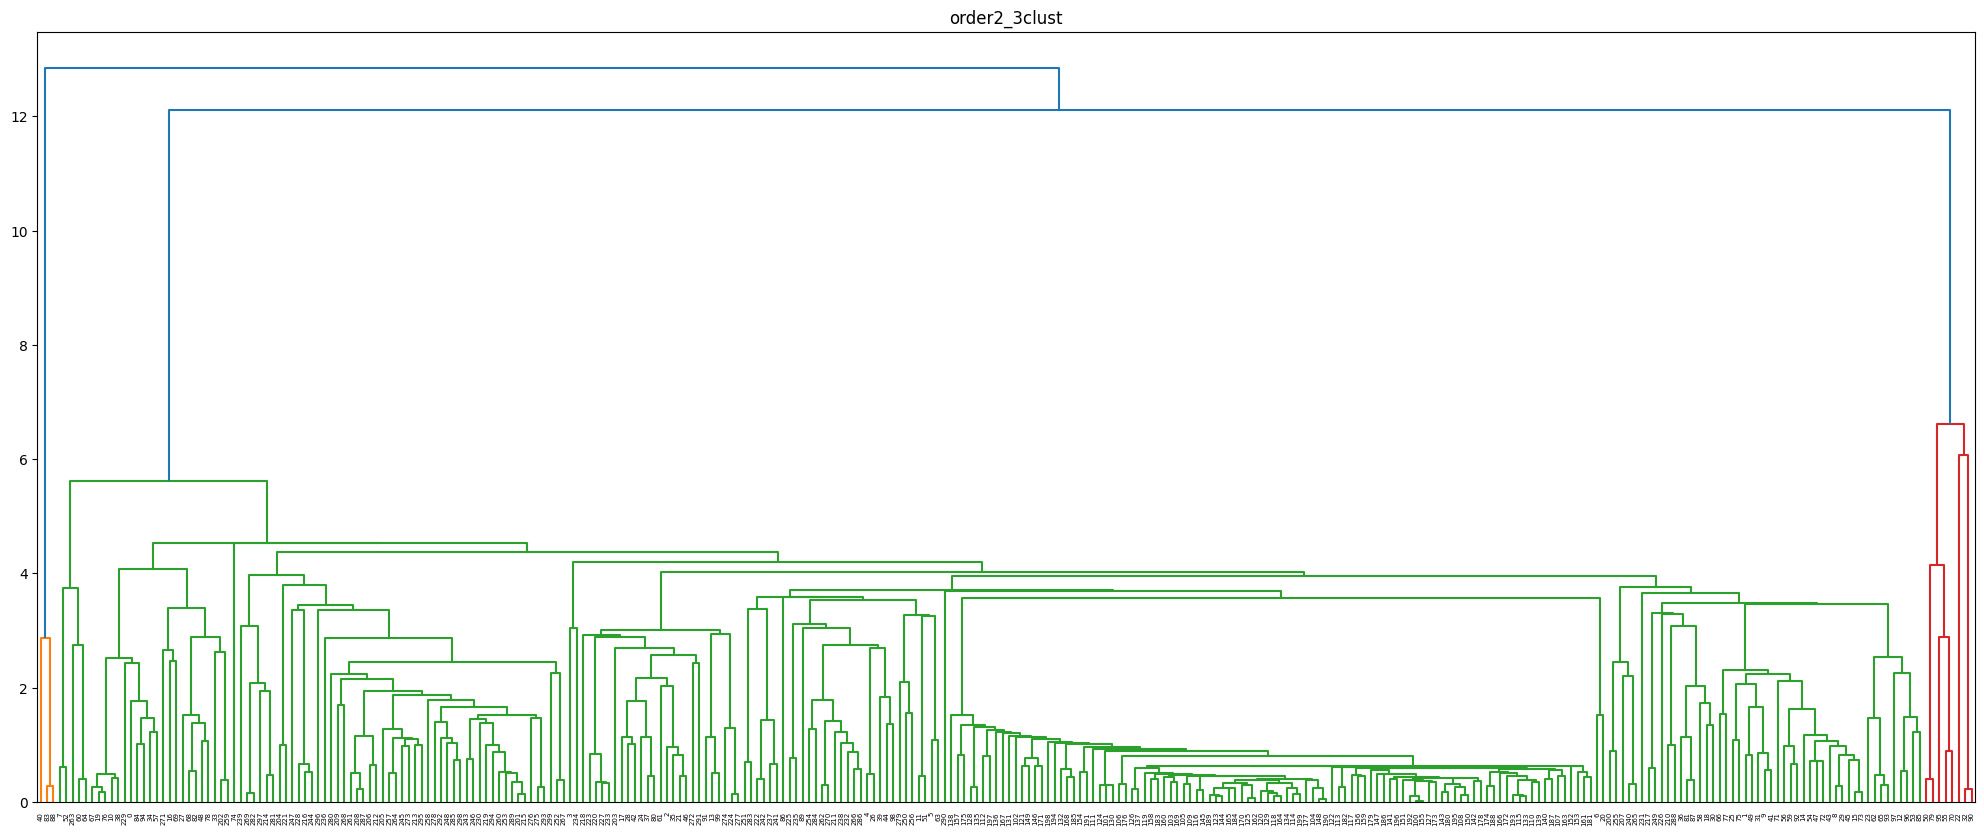

iris


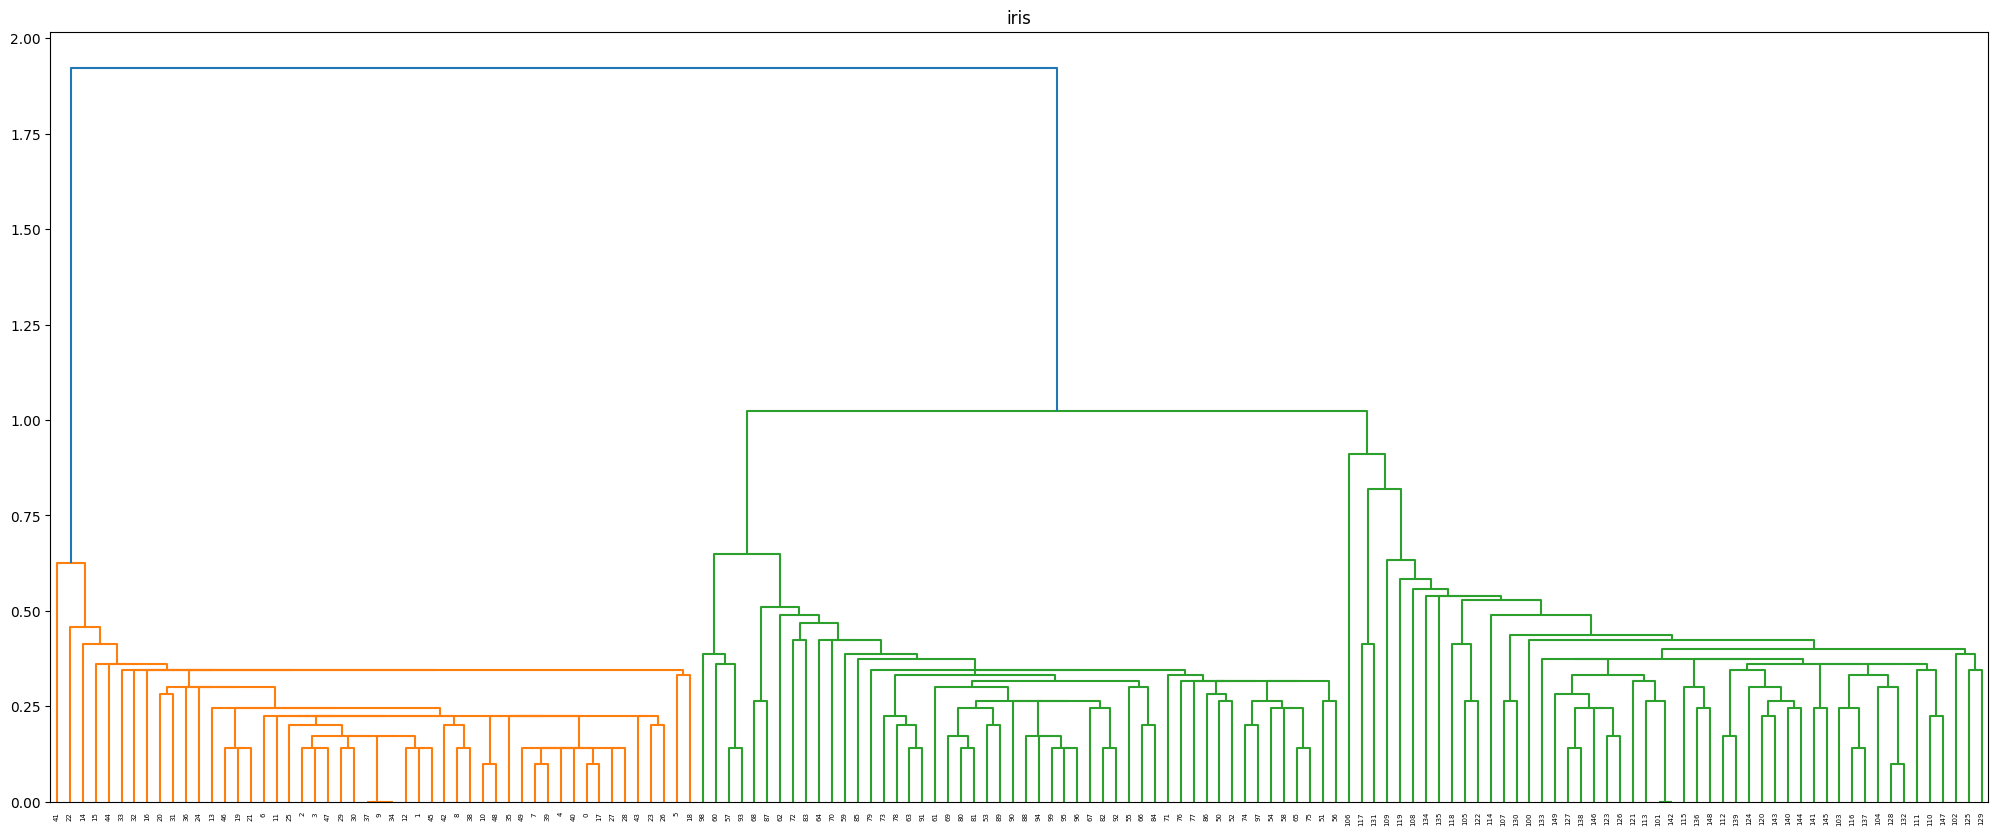

long_data


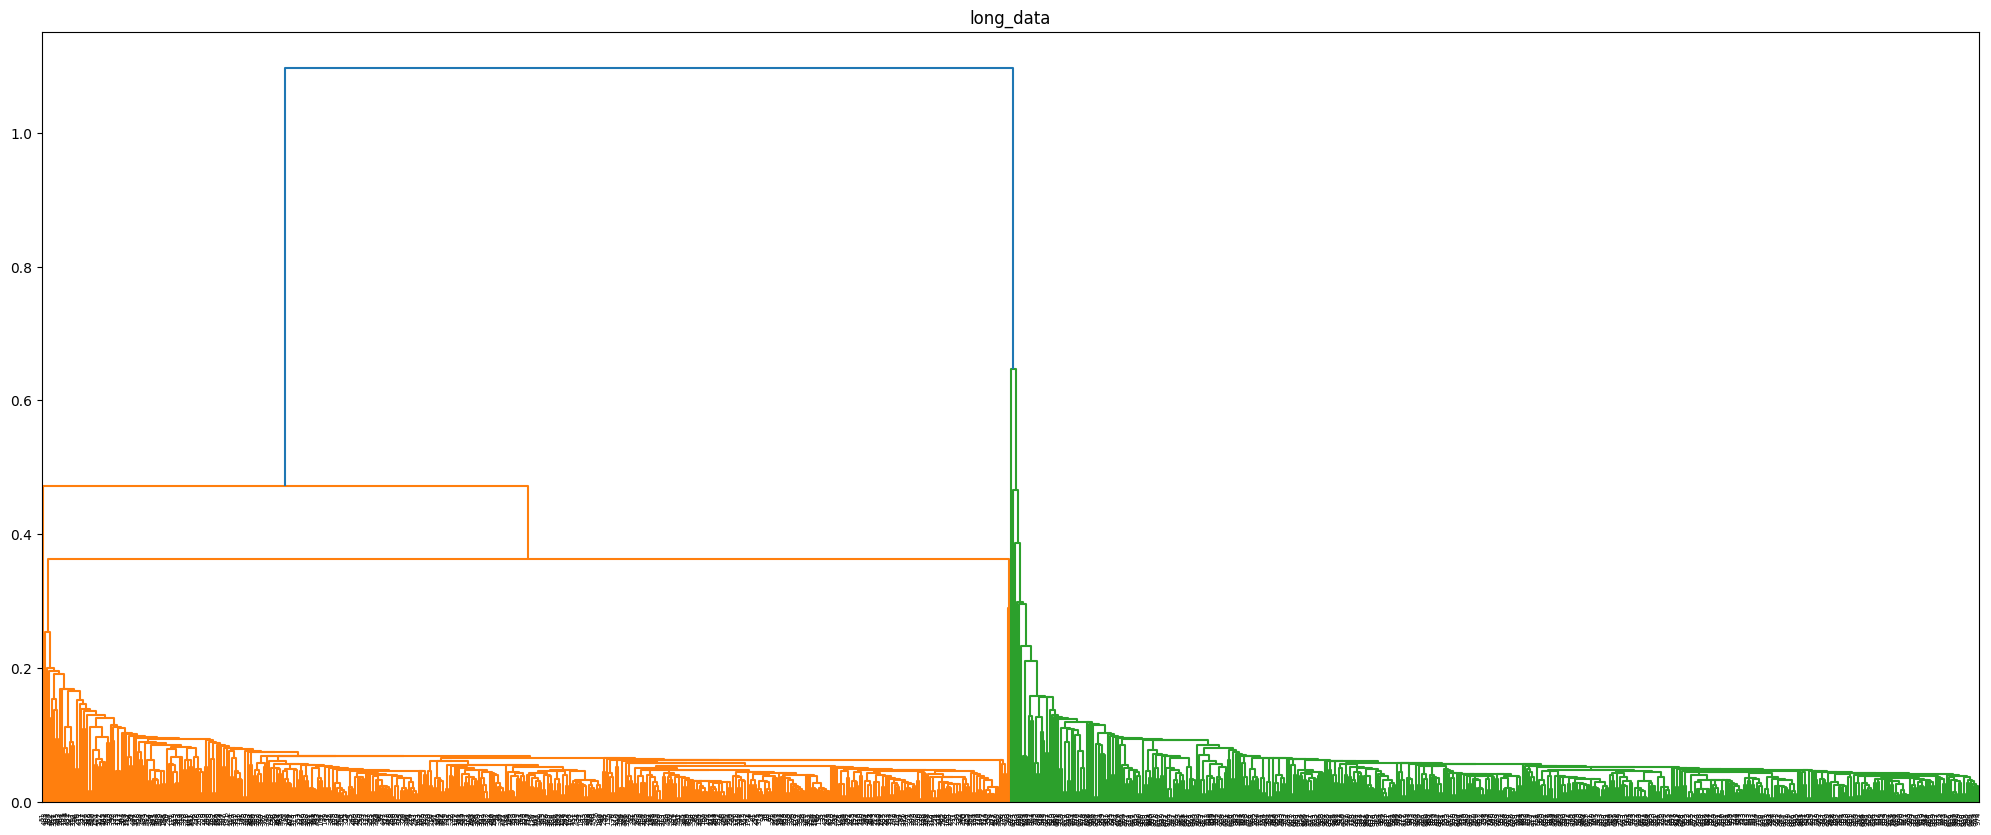

smile


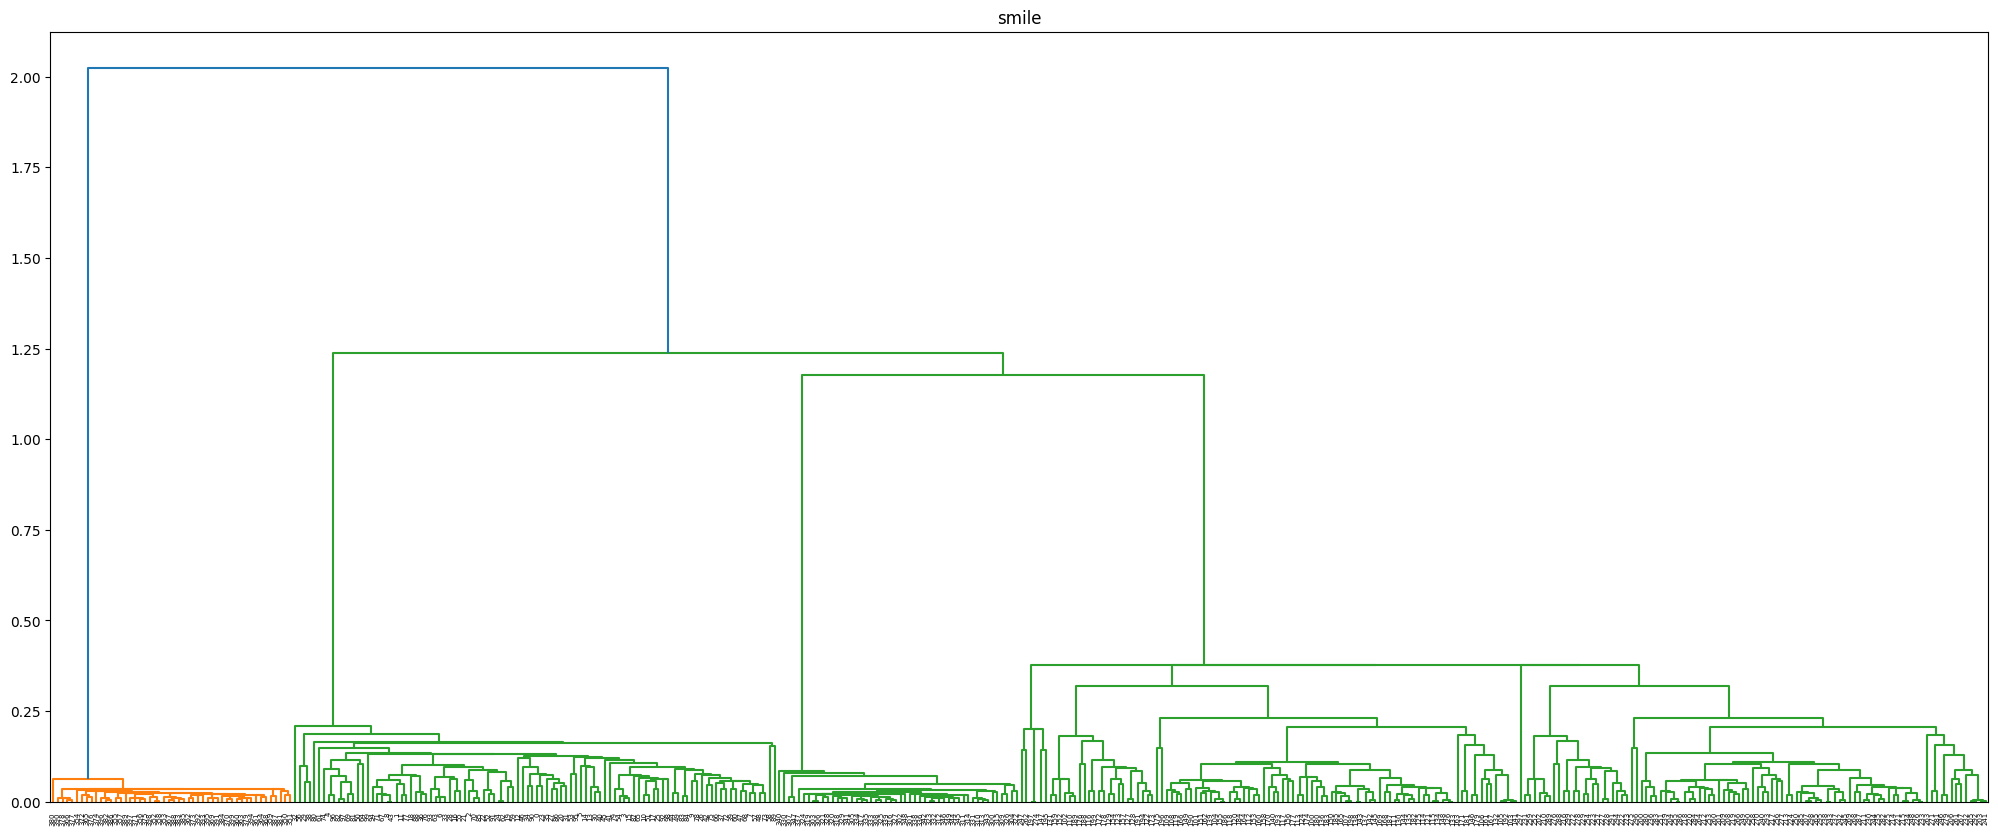

square_data


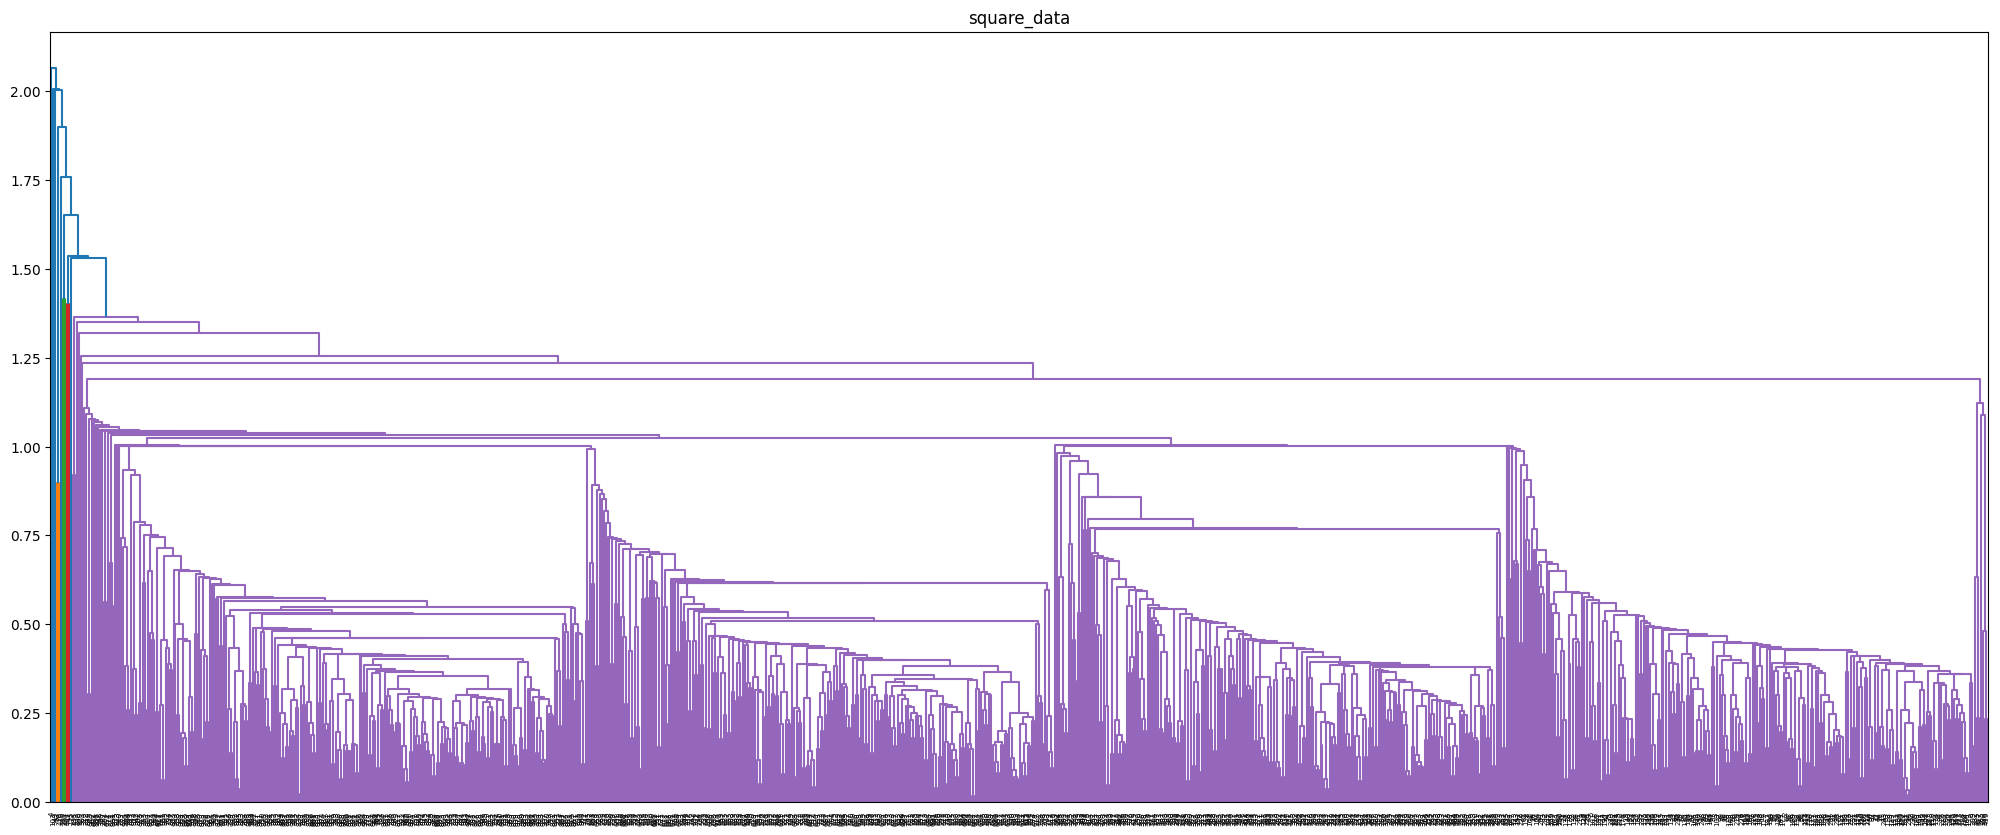

In [48]:
for key in datasets:
    print(key)
    clusters[key].append(linkage(datasets[key], method='average', metric='euclidean'))
    # plot each dendrogram
    fig = plt.figure(figsize=(25, 10))
    dendo = dendrogram(clusters[key][0])
    plt.title(key)
    plt.show()
    

# Complete-linkage


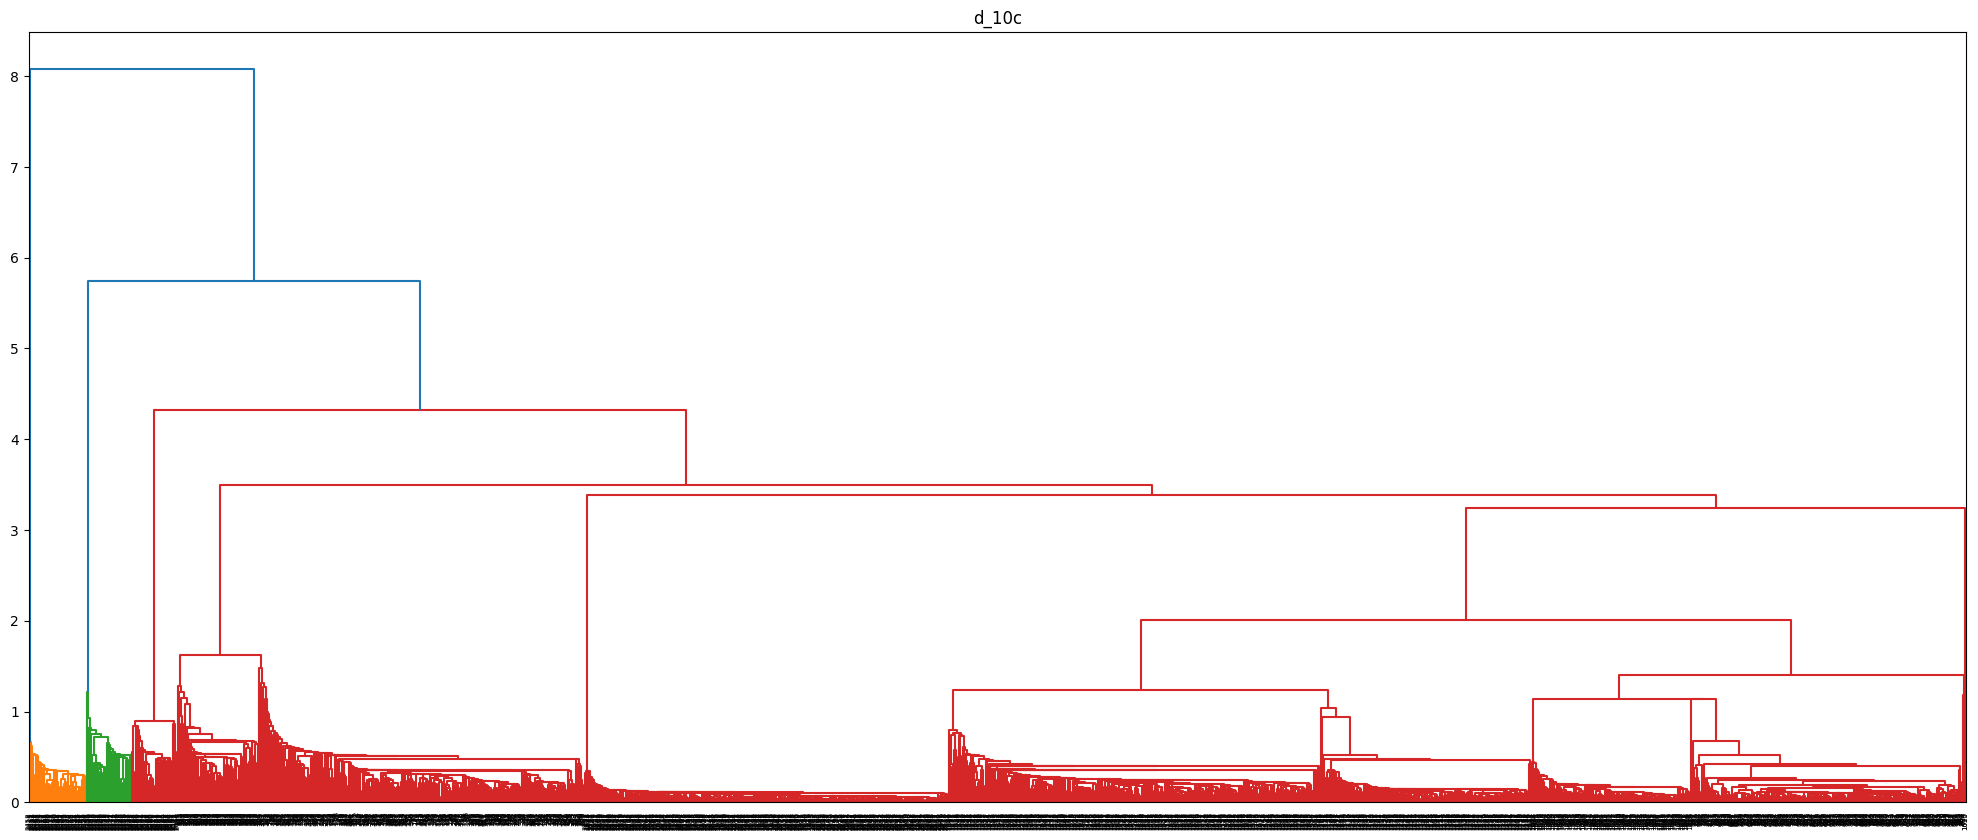

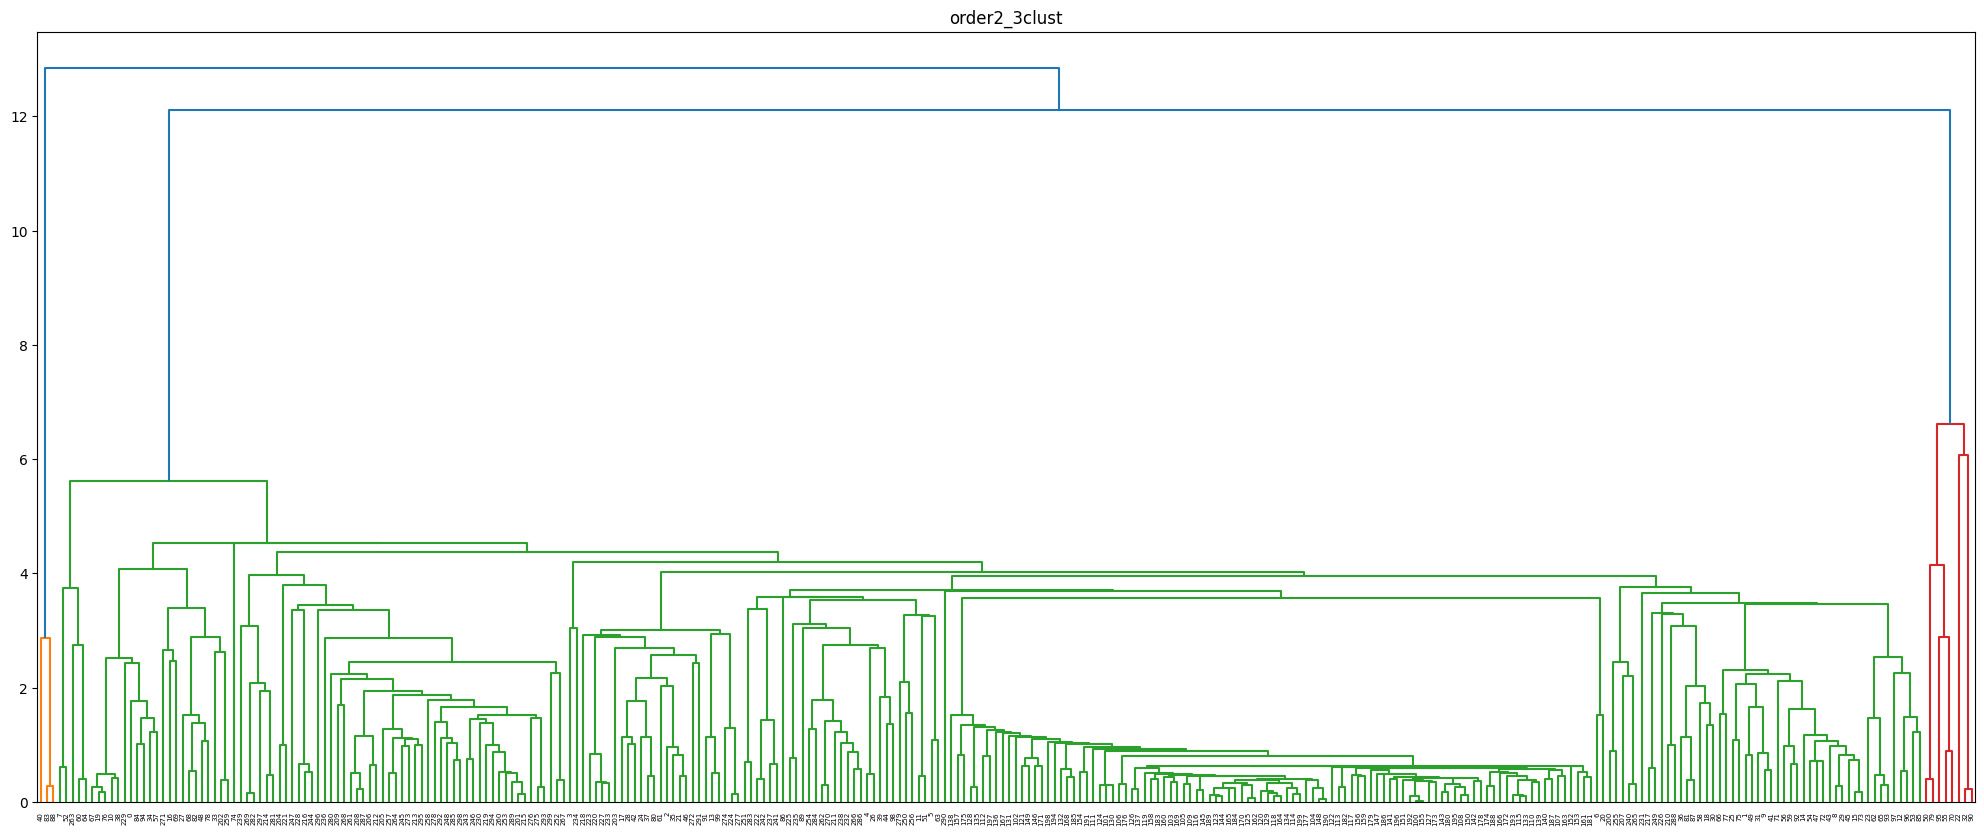

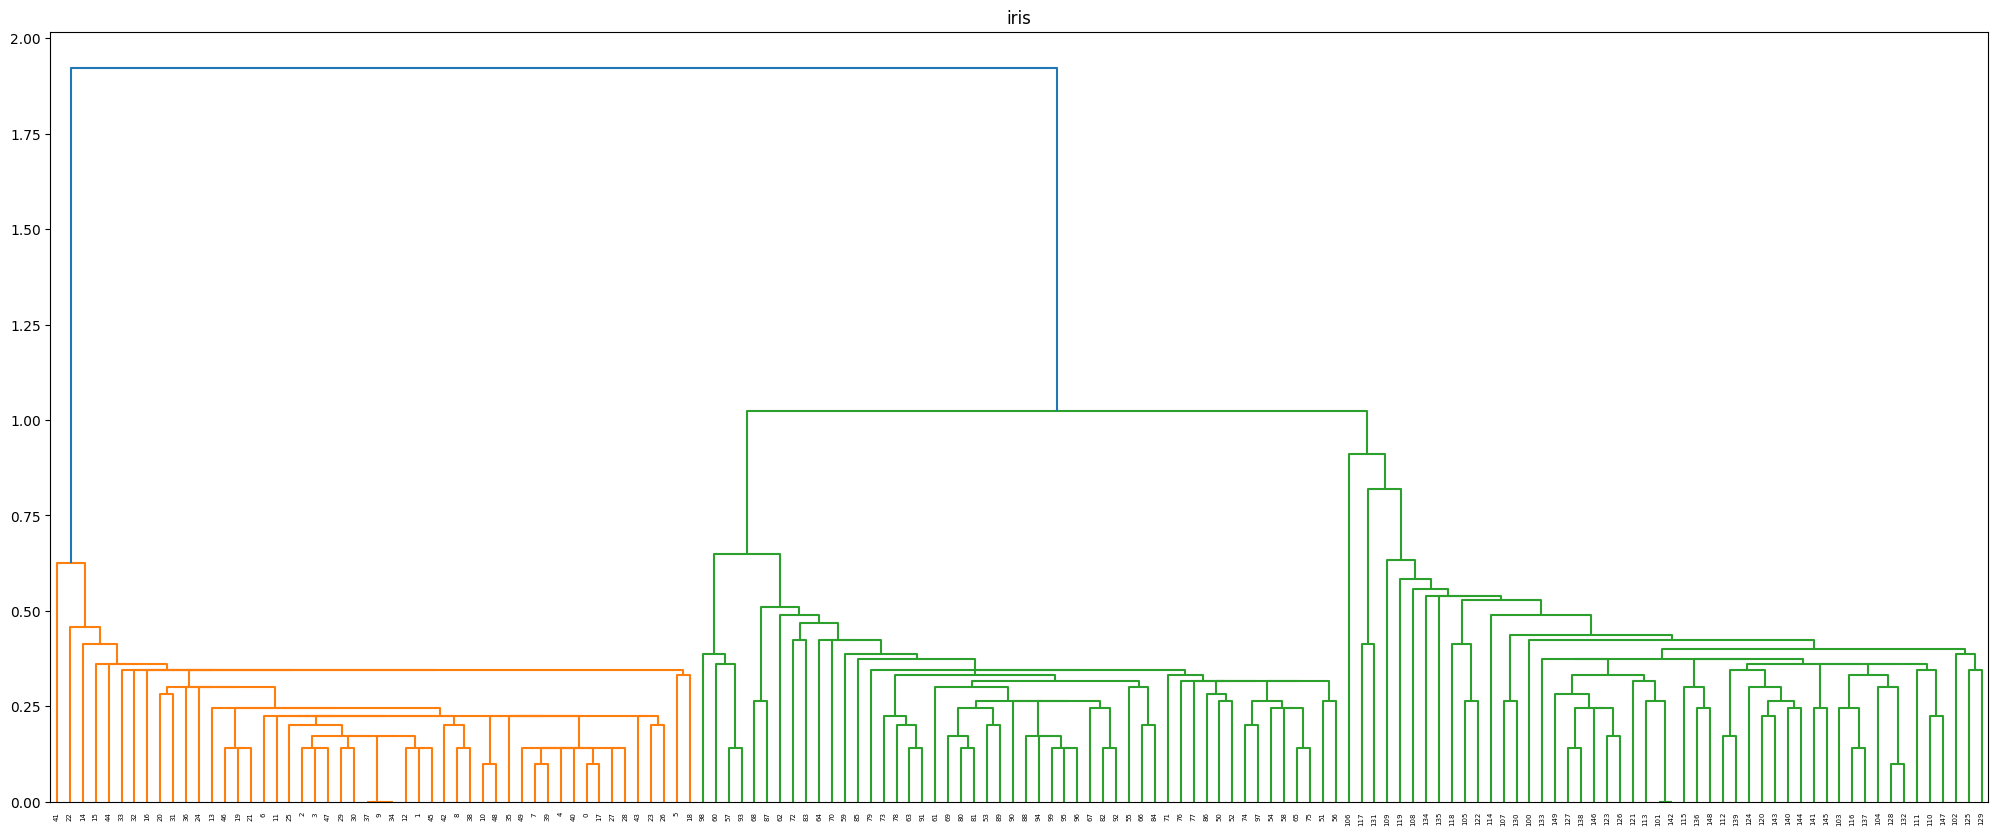

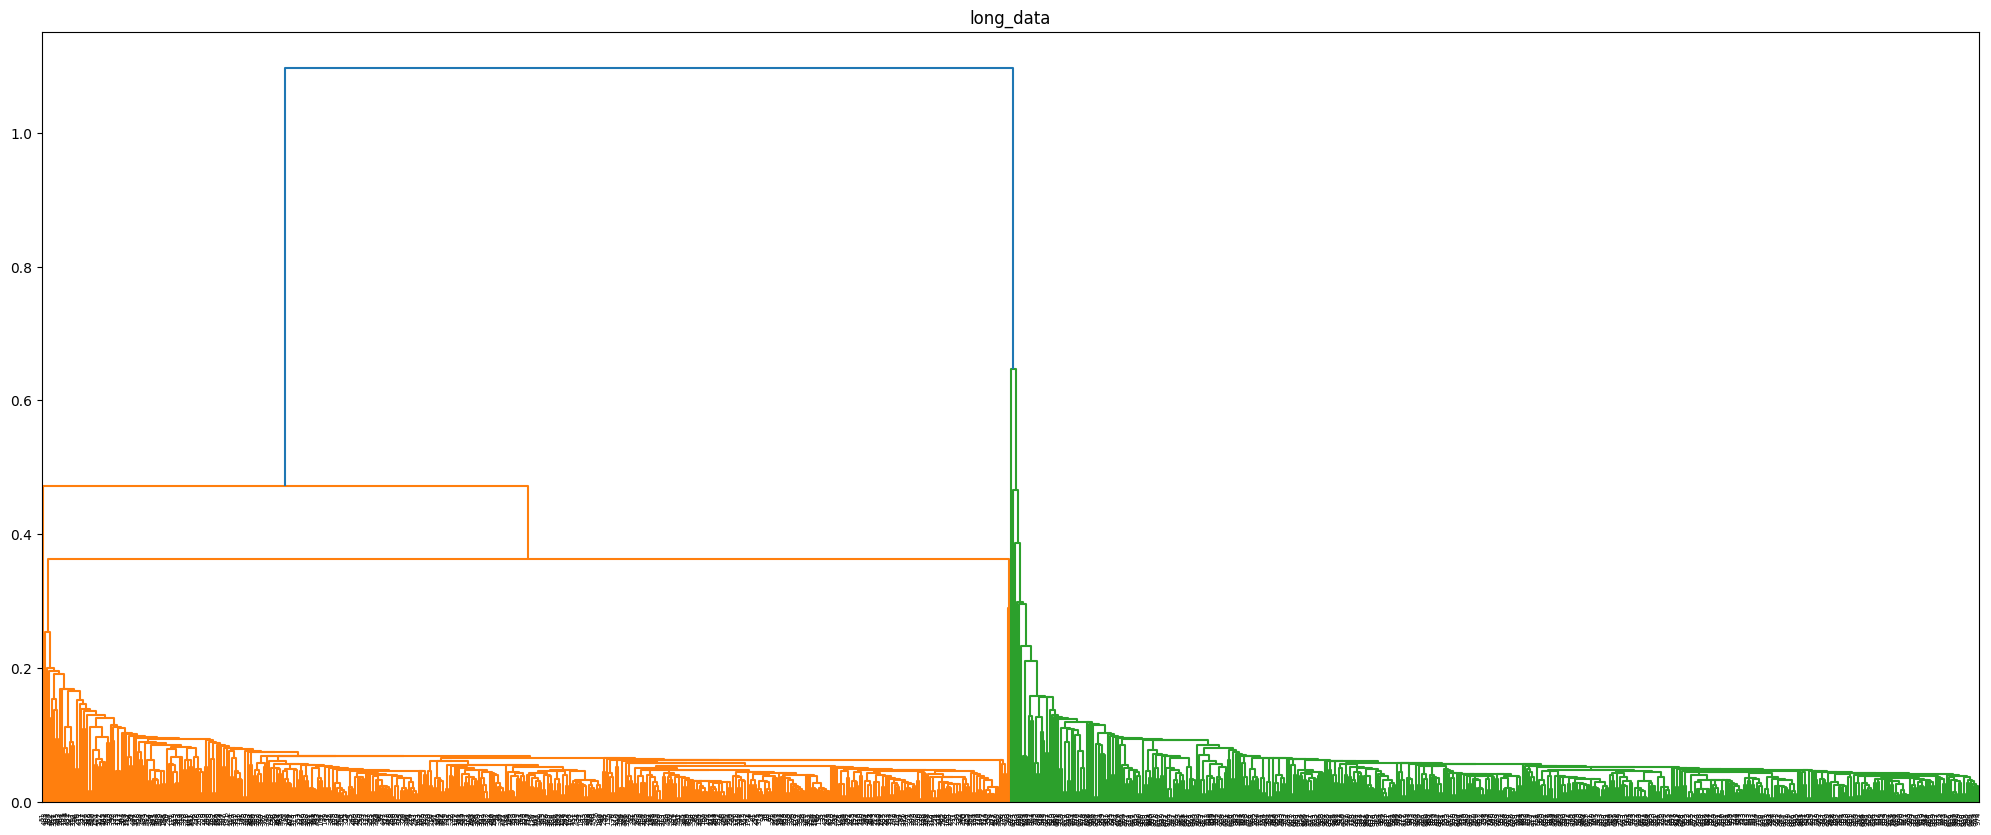

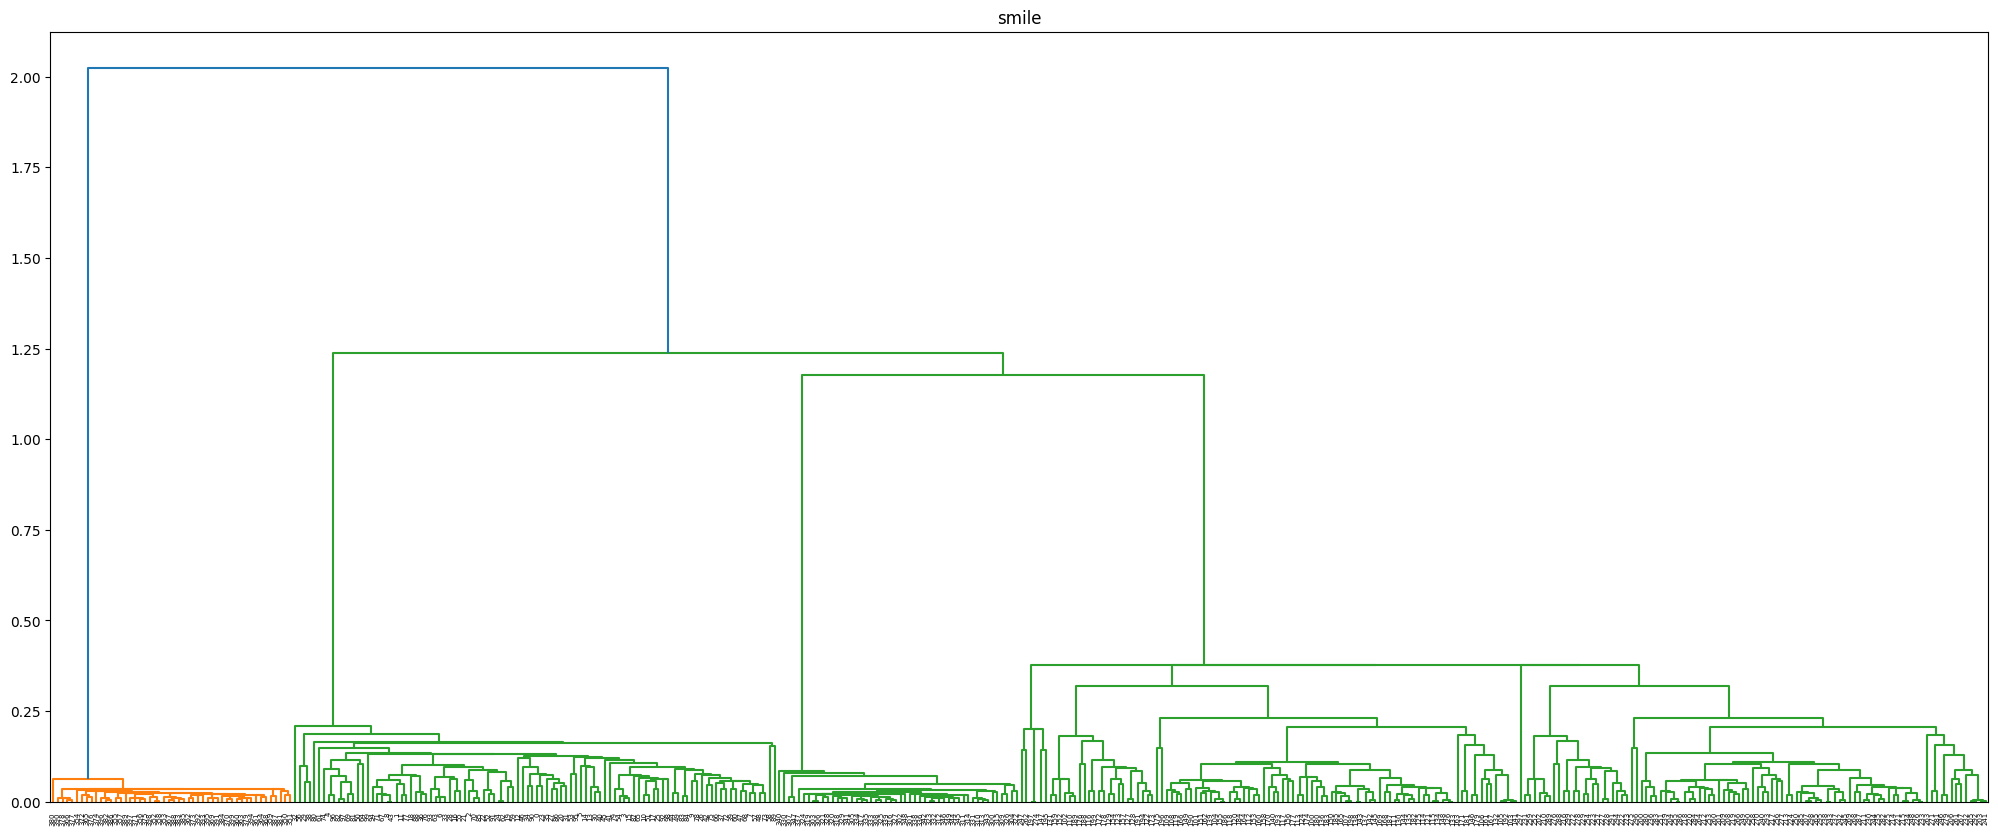

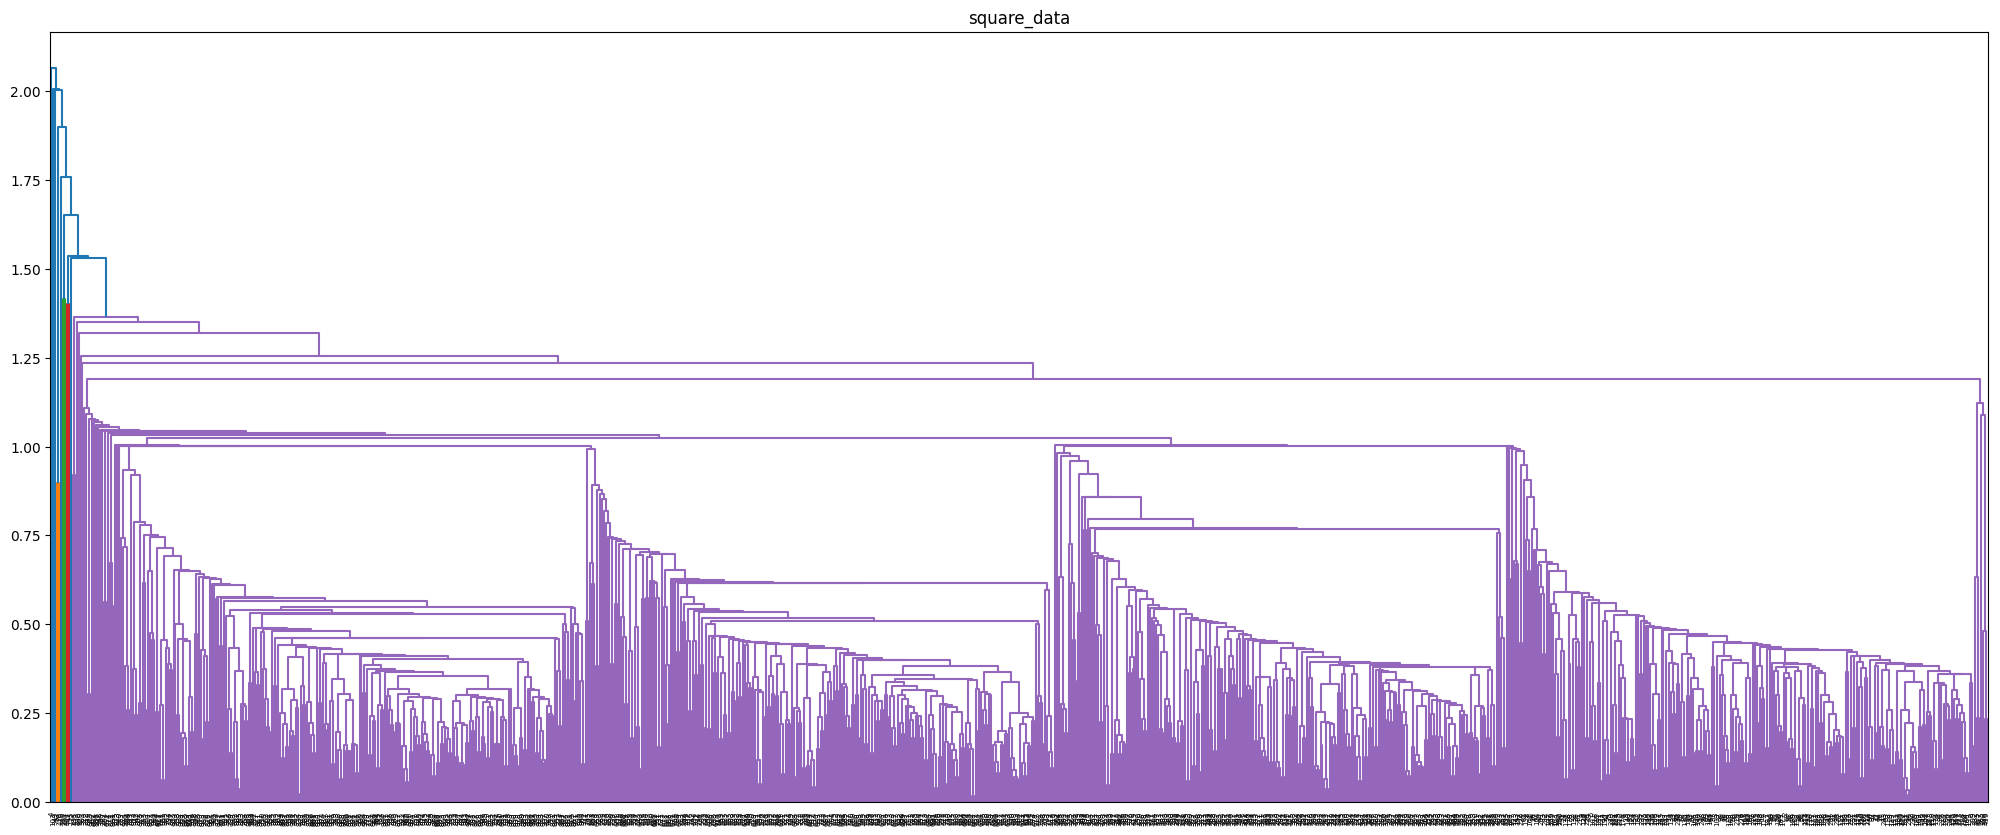

In [72]:
for key in datasets:
    clusters[key].append(linkage(datasets[key], method='complete', metric='euclidean', optimal_ordering=True))
    fig = plt.figure(figsize=(25, 10))
    dendo = dendrogram(clusters[key][0], show_contracted=True)
    plt.title(key)
    plt.show()

# ward variance


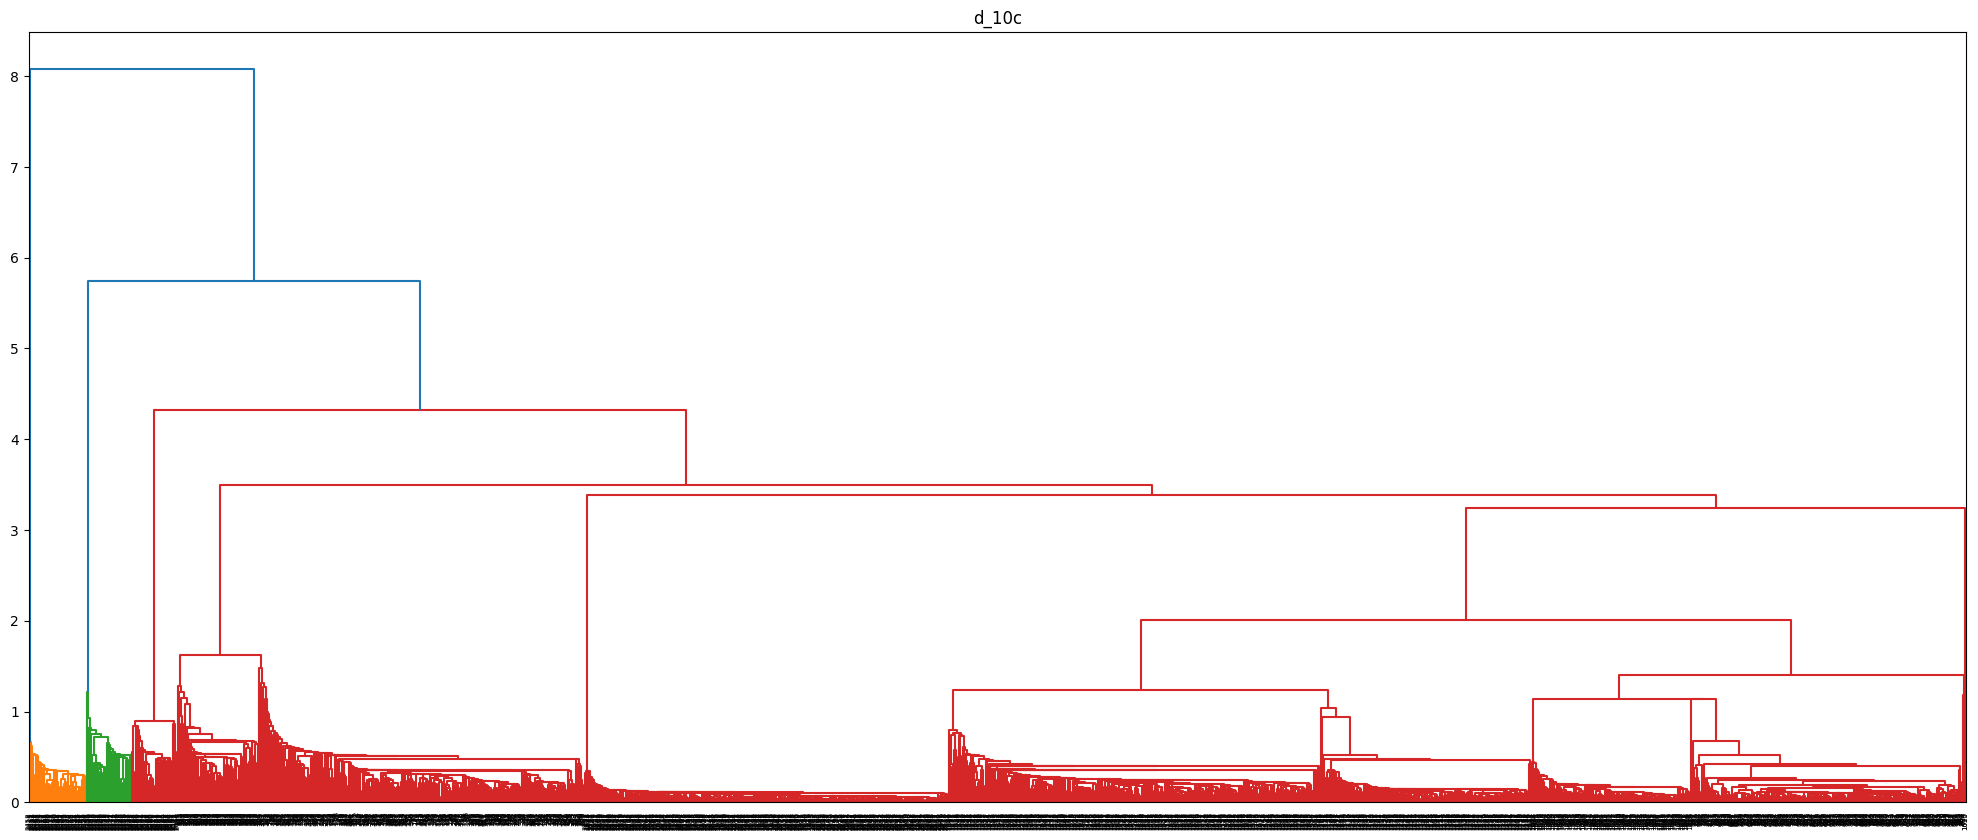

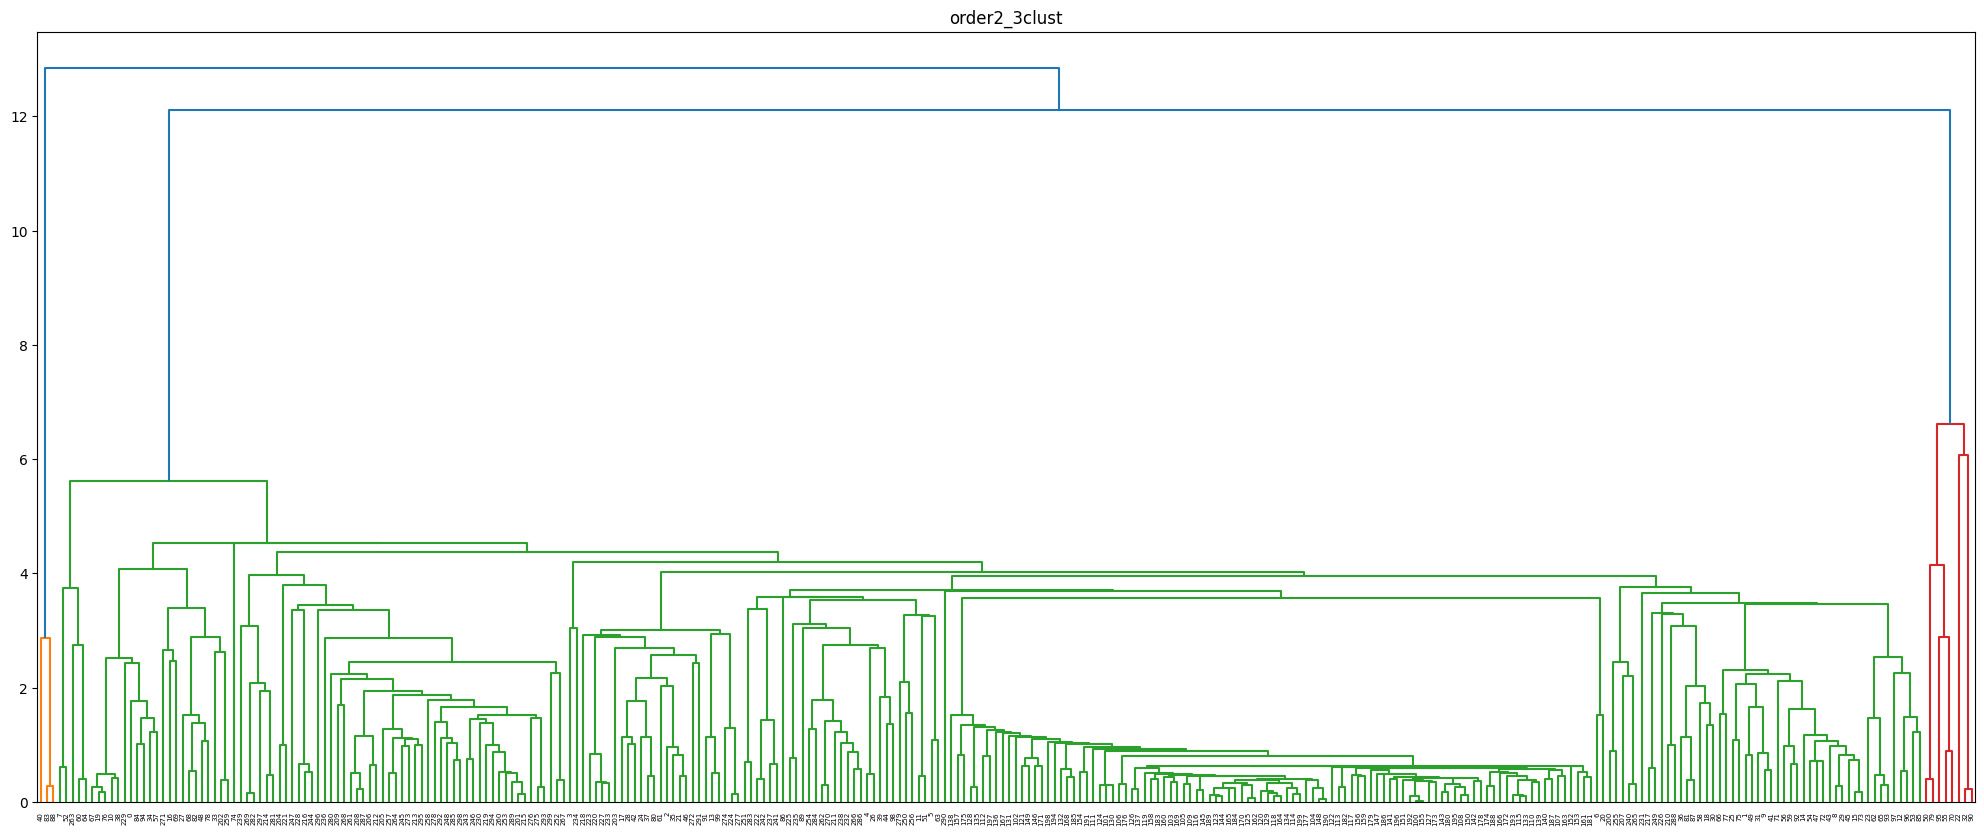

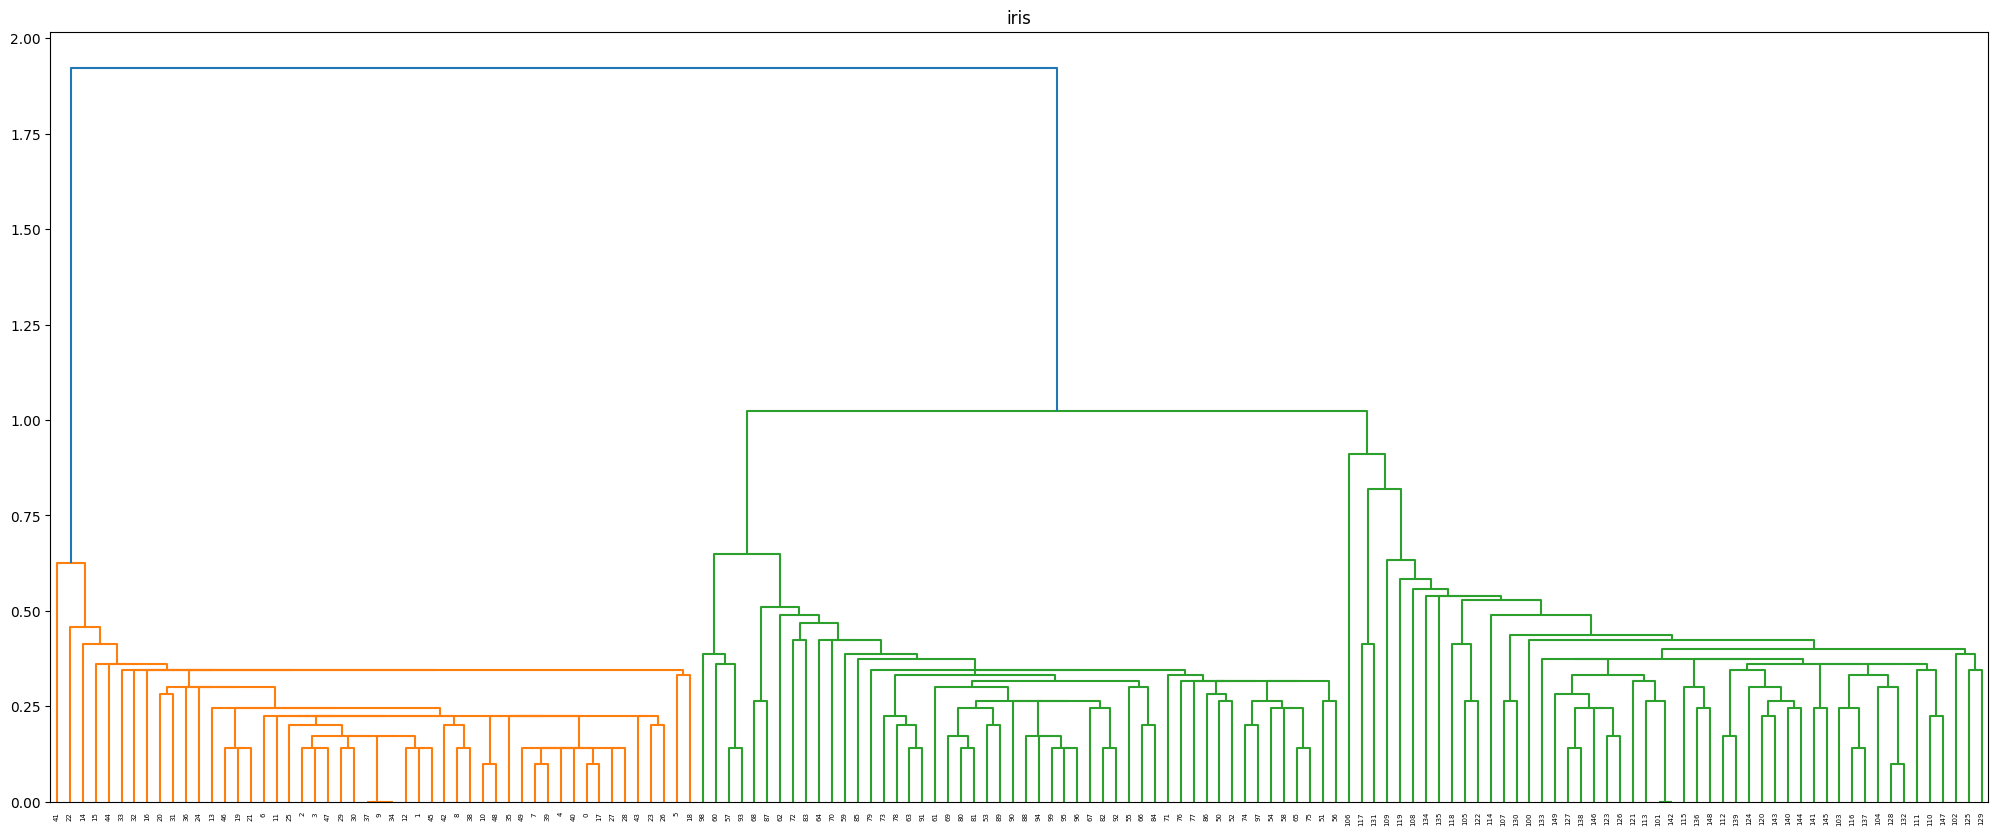

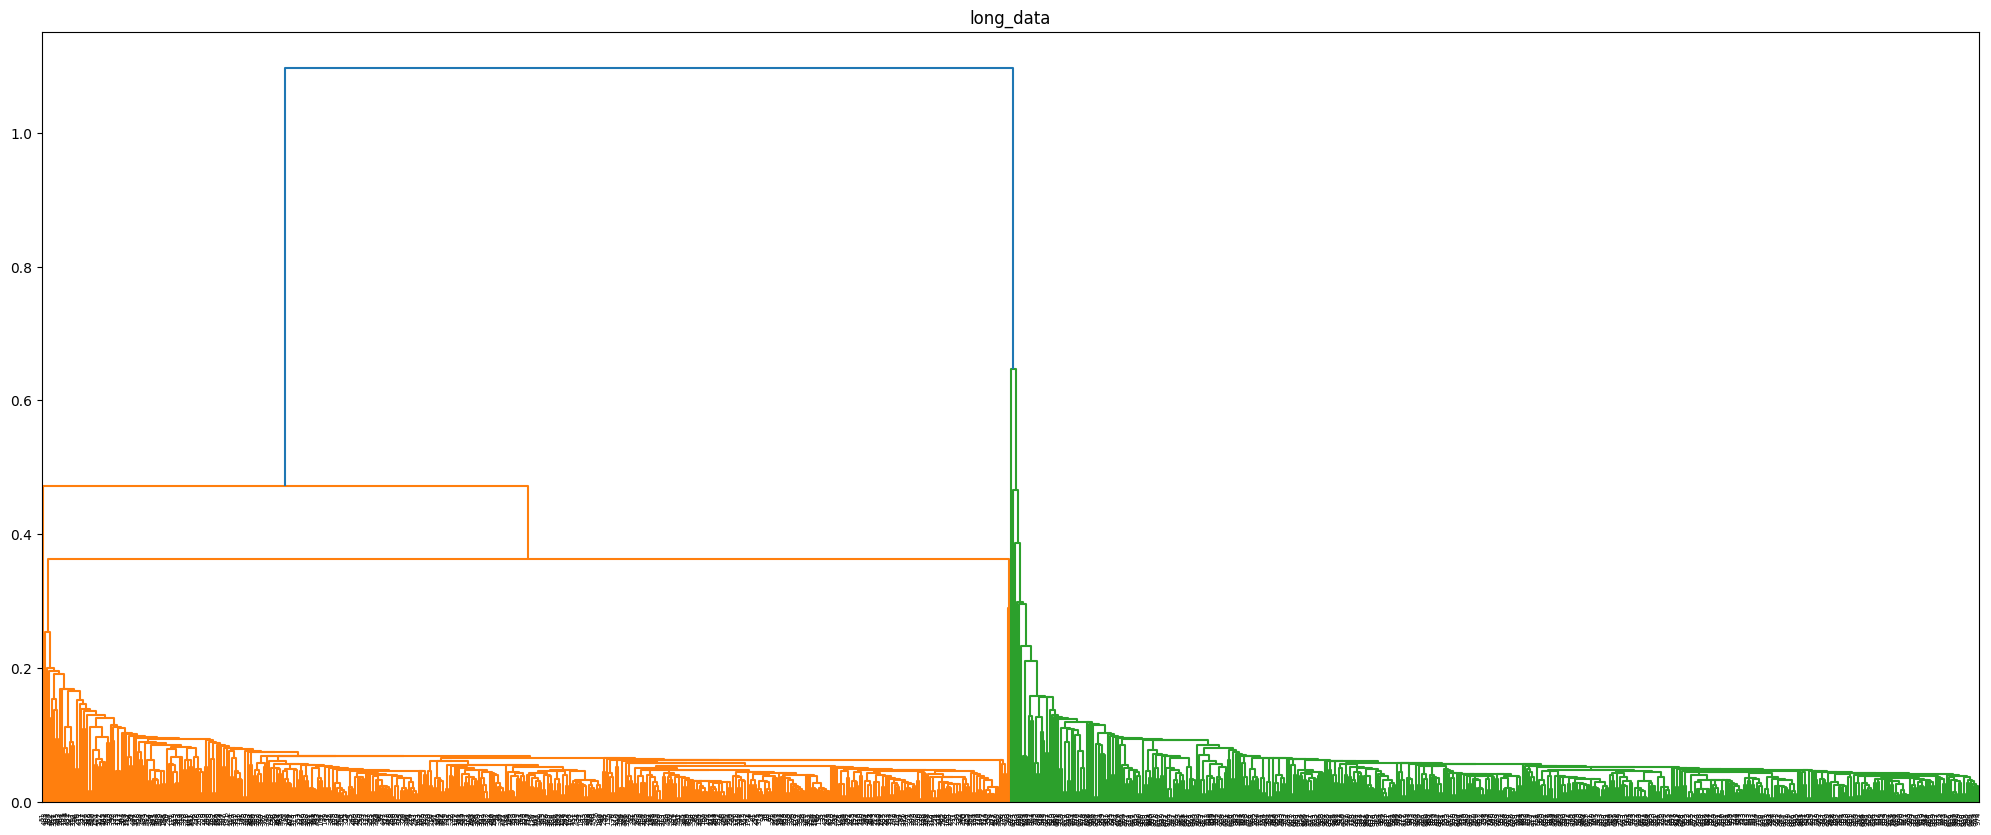

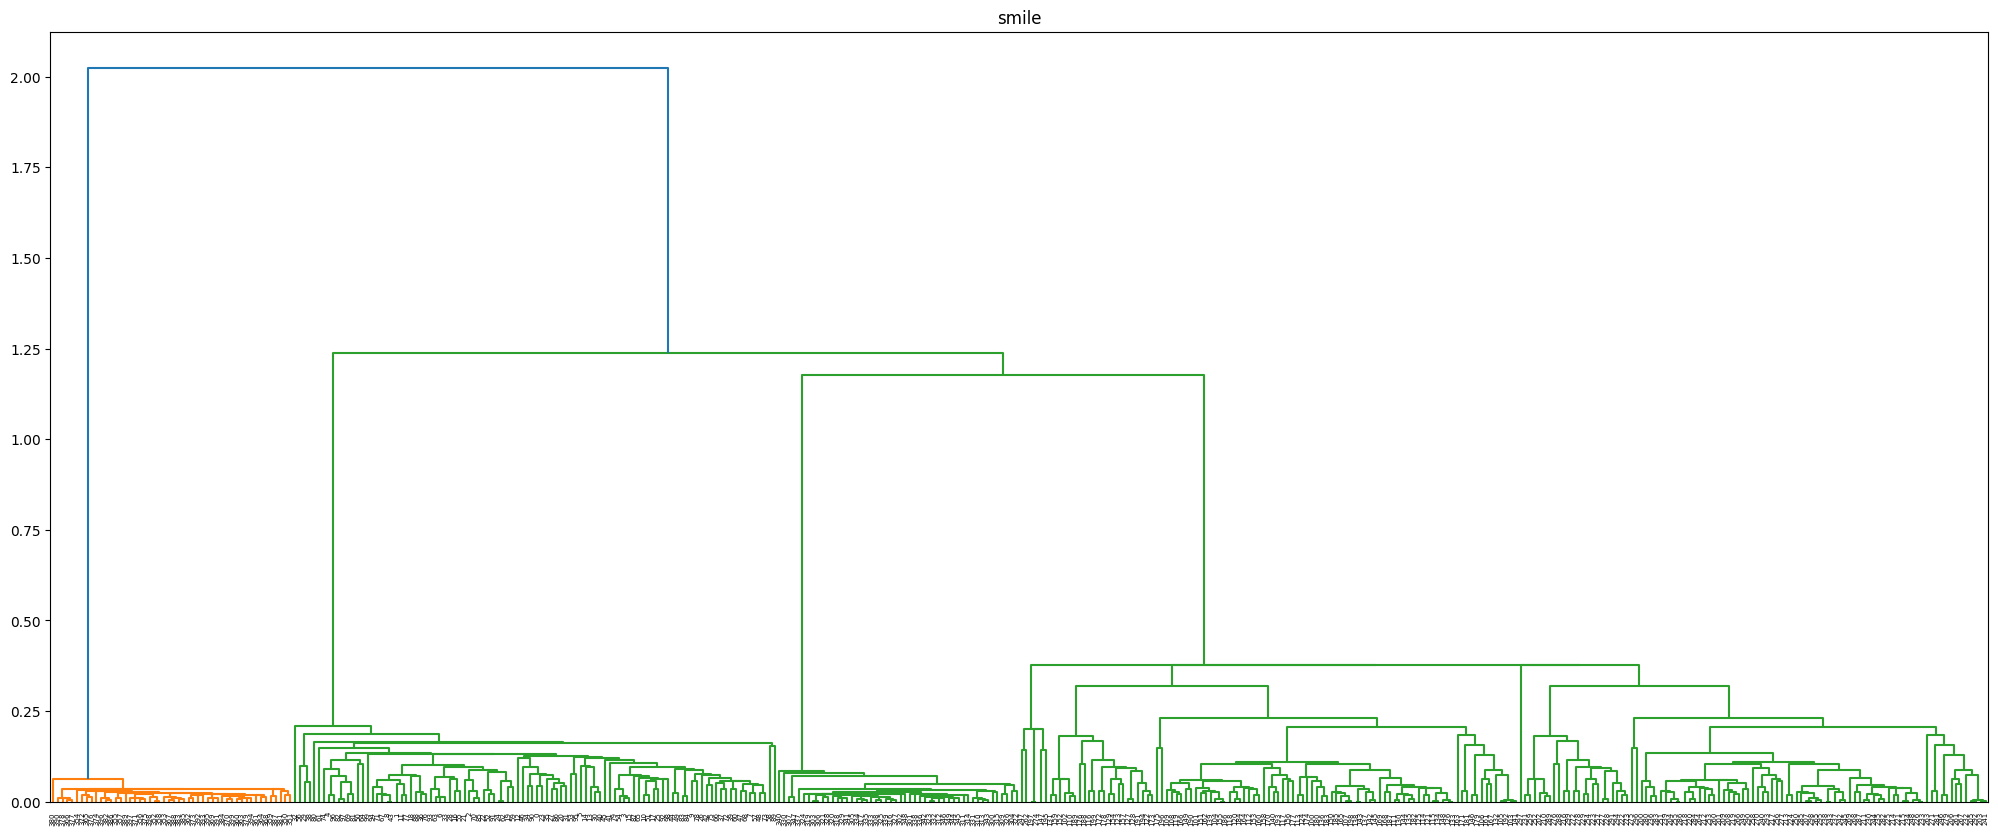

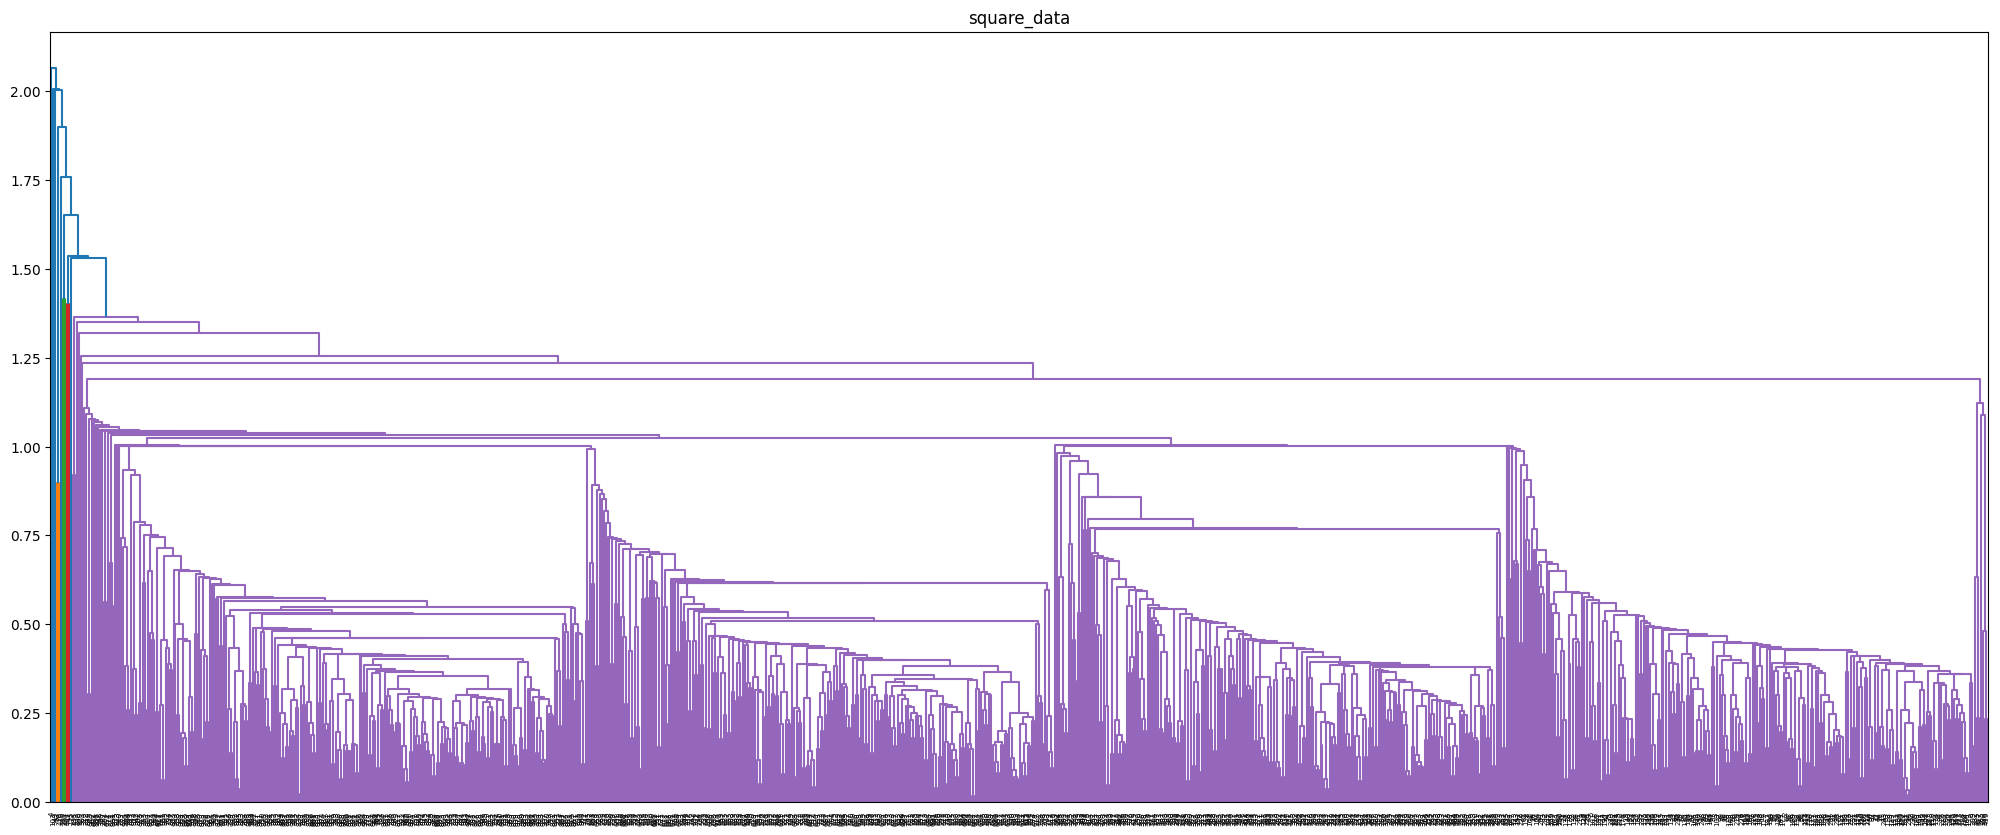

In [70]:
for key in datasets:
    clusters[key].append(linkage(datasets[key], method='ward', metric='euclidean'))
    fig = plt.figure(figsize=(25, 10))
    dendo = dendrogram(clusters[key][0])
    plt.title(key)
    plt.show()

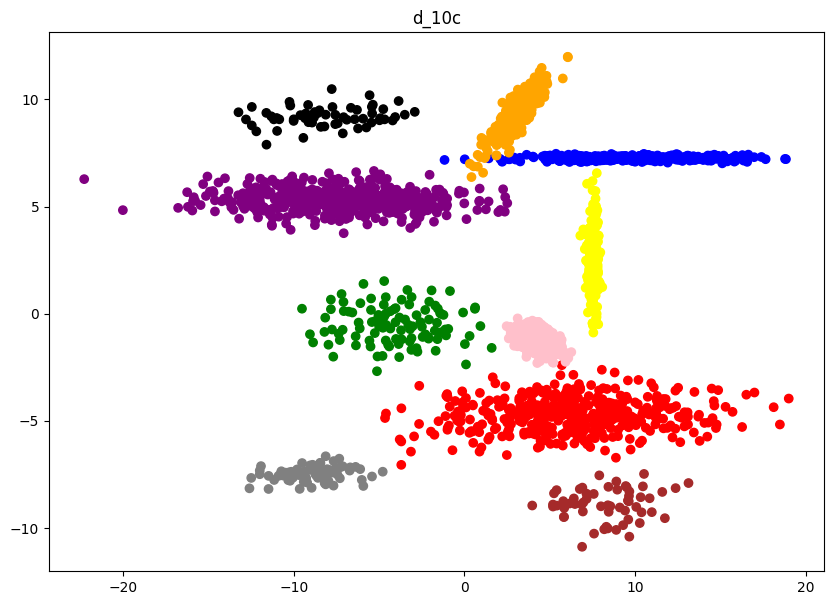

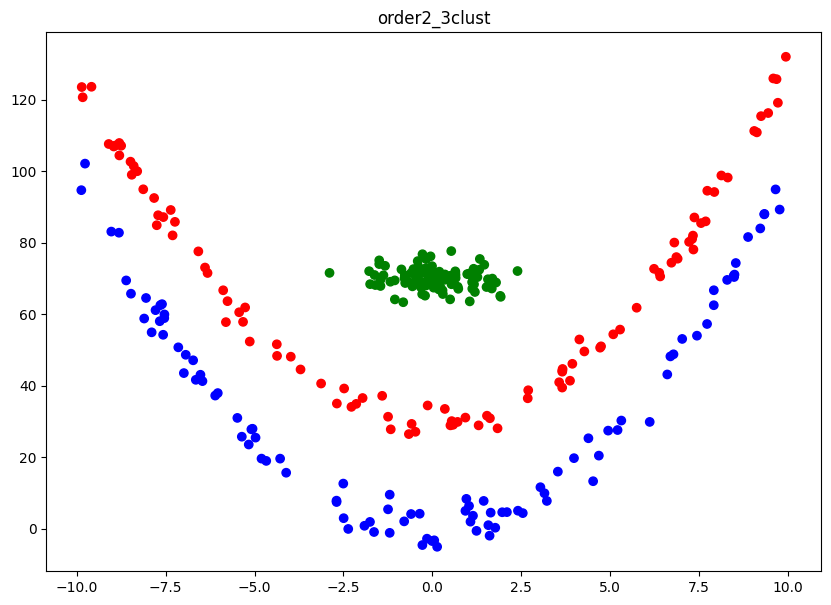

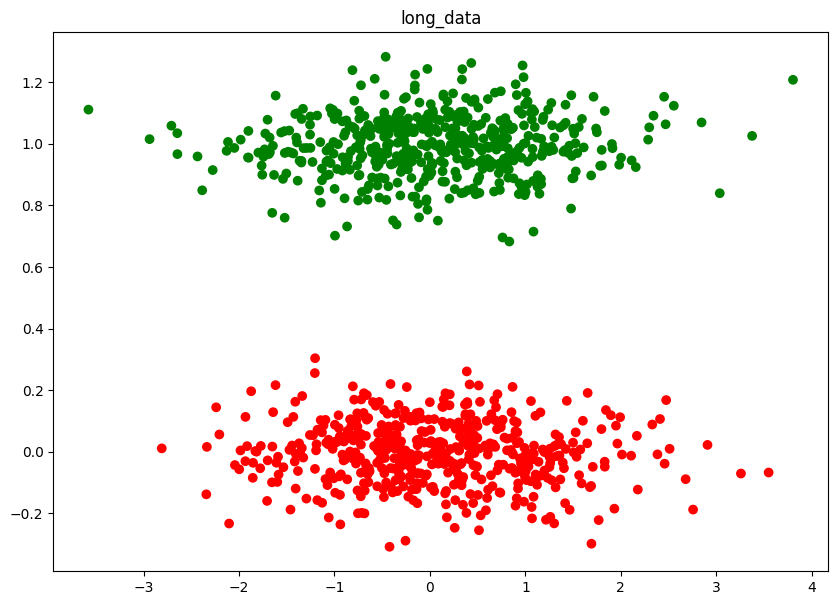

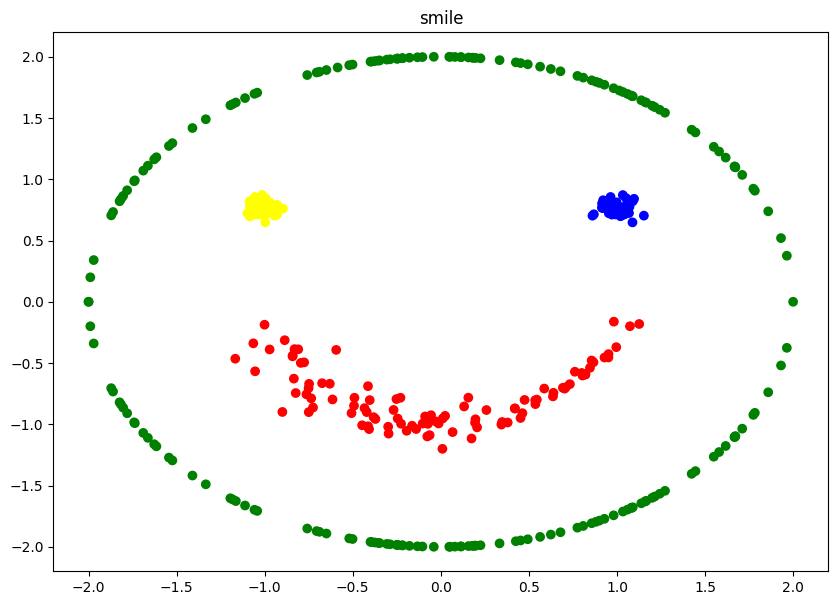

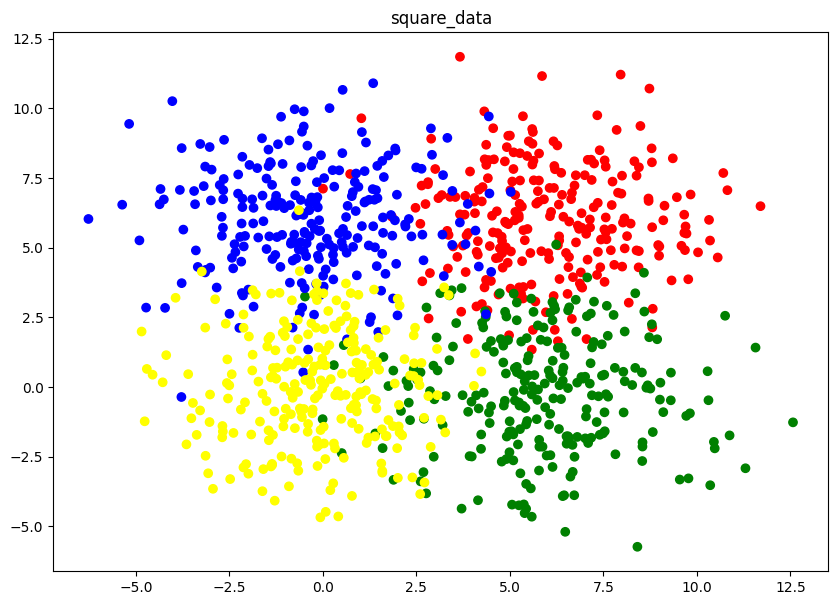

In [96]:
# Visualize the clusters
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'gray', 'black']

for key in datasets.keys():
    if key != "iris":
        # scatter the dataset with different colors for each class
        k = len(np.unique(datasets[key][2]))
        custom_cmap = ListedColormap(colors[:k])
        plt.figure(figsize=(10, 7))
        plt.scatter(datasets[key][0], datasets[key][1], c=datasets[key][2], cmap=custom_cmap)
        plt.title(key)
        plt.show()

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Special imports
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

results = {}

for key in datasets:
    results[key] = {}

for method in ["single", "complete", "average", "ward"]:
    for key in datasets:
        cluster = AgglomerativeClustering(n_clusters=classes[key], metric='euclidean', linkage=method, compute_full_tree=True)
        cluster.fit_predict(datasets[key])

        results[key][method] = cluster.labels_


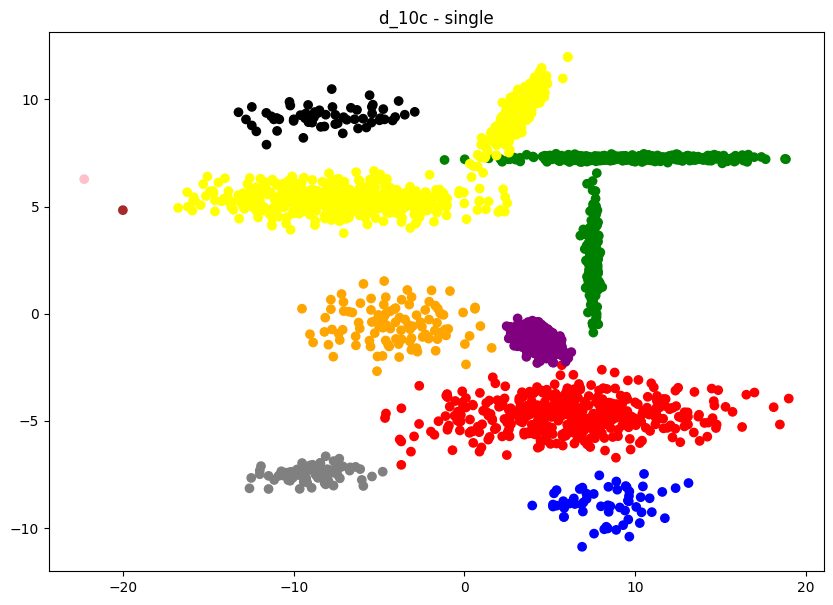

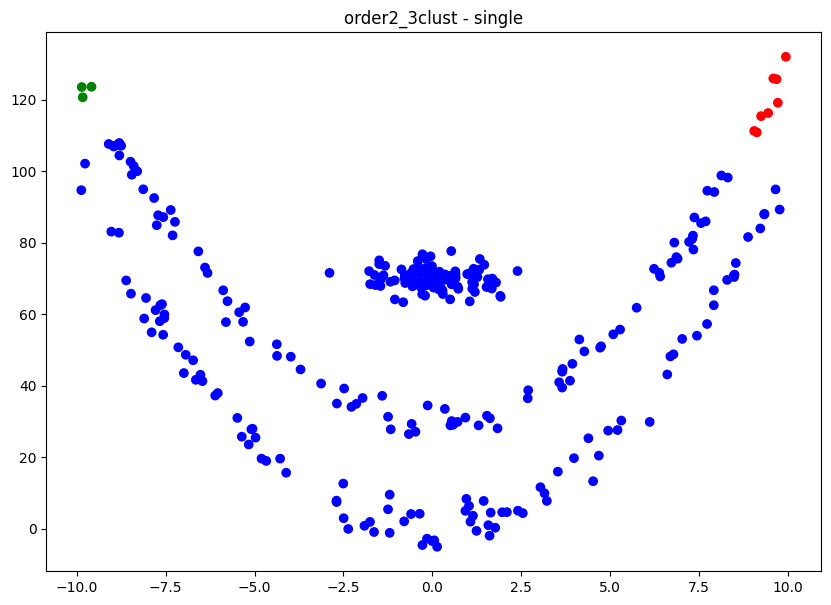

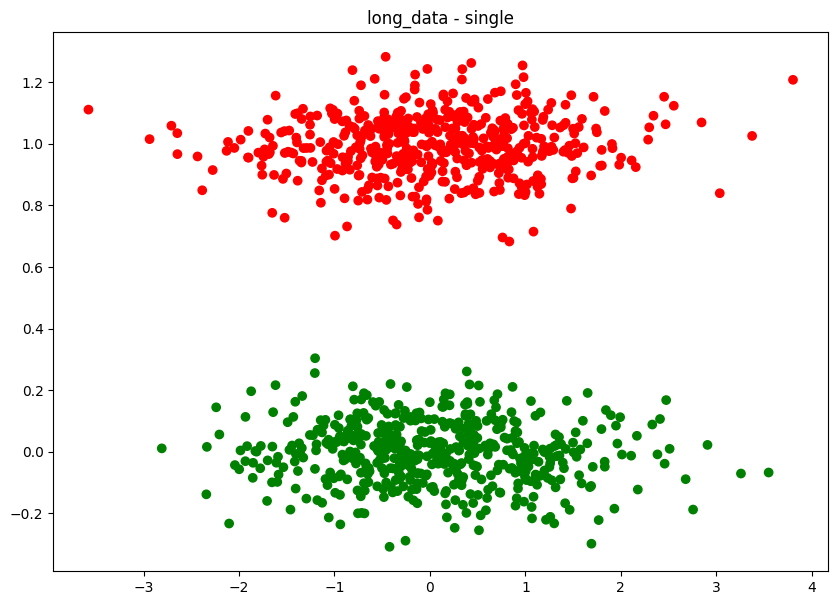

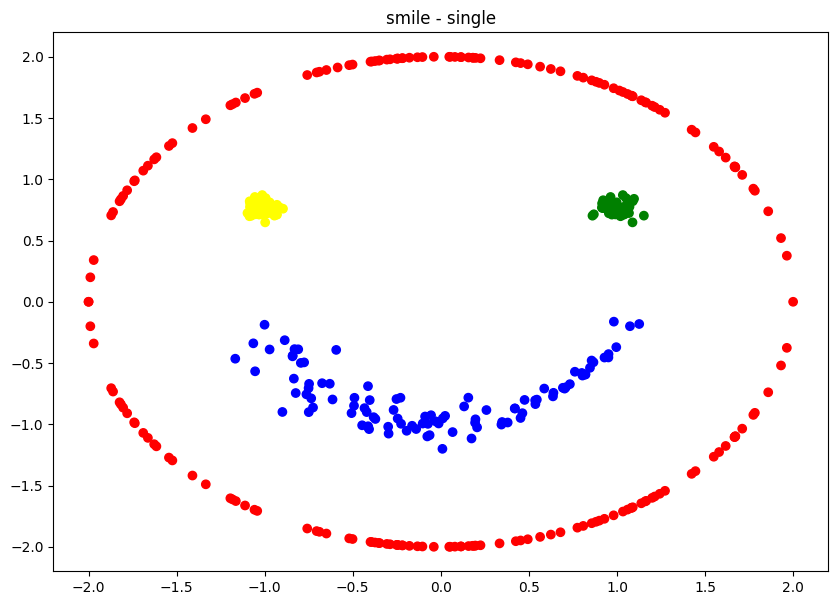

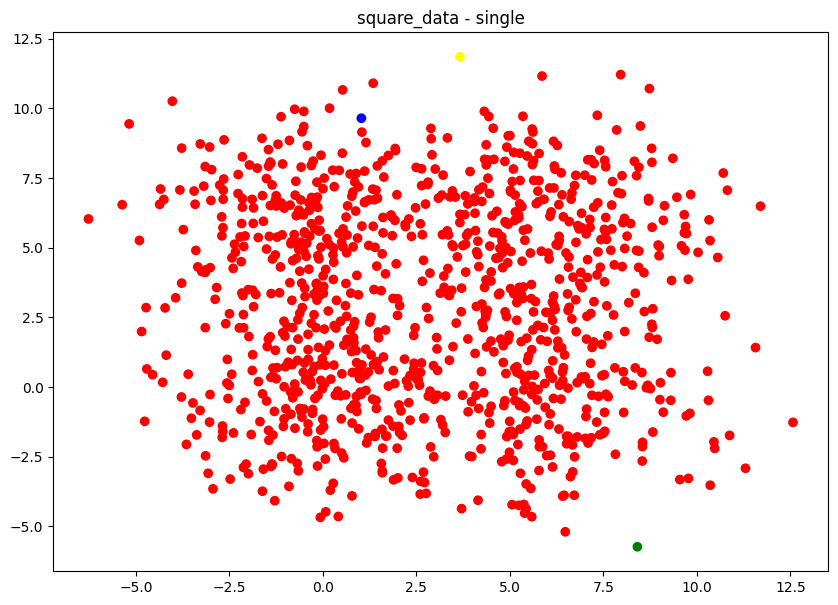

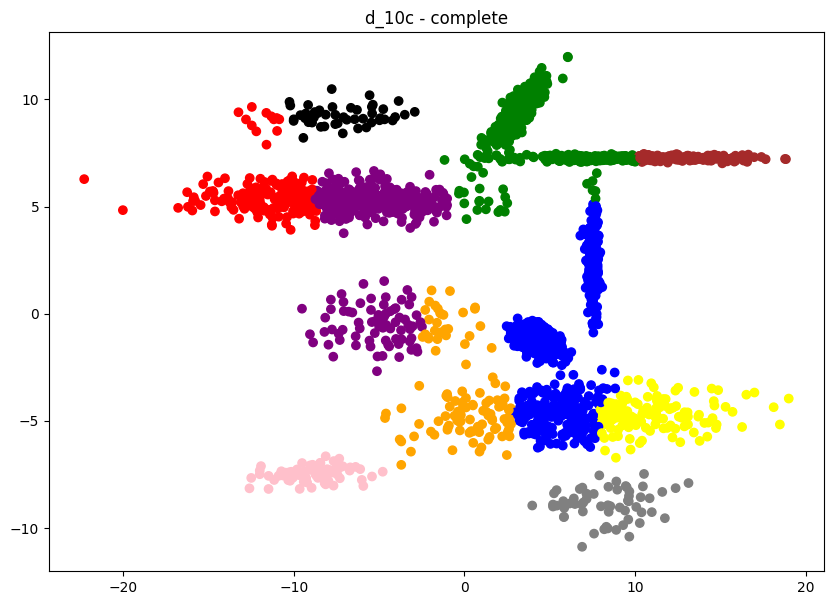

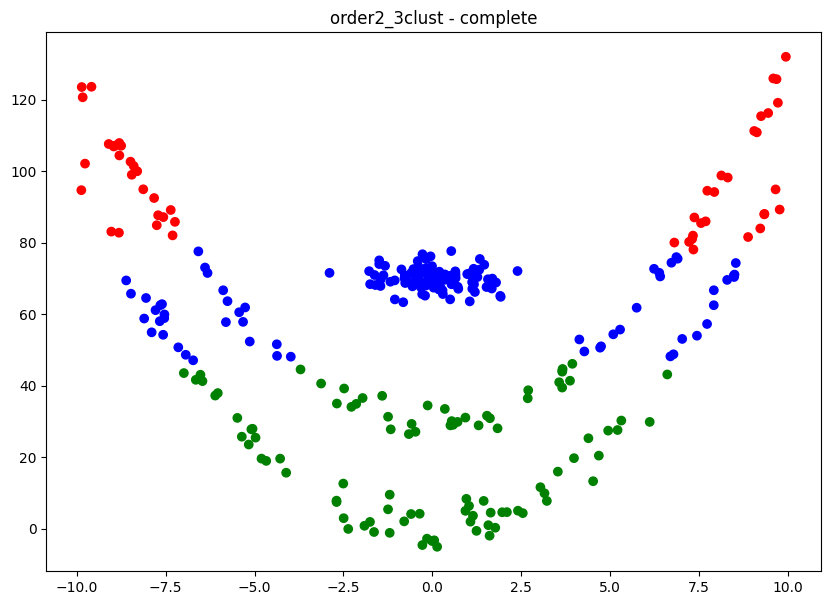

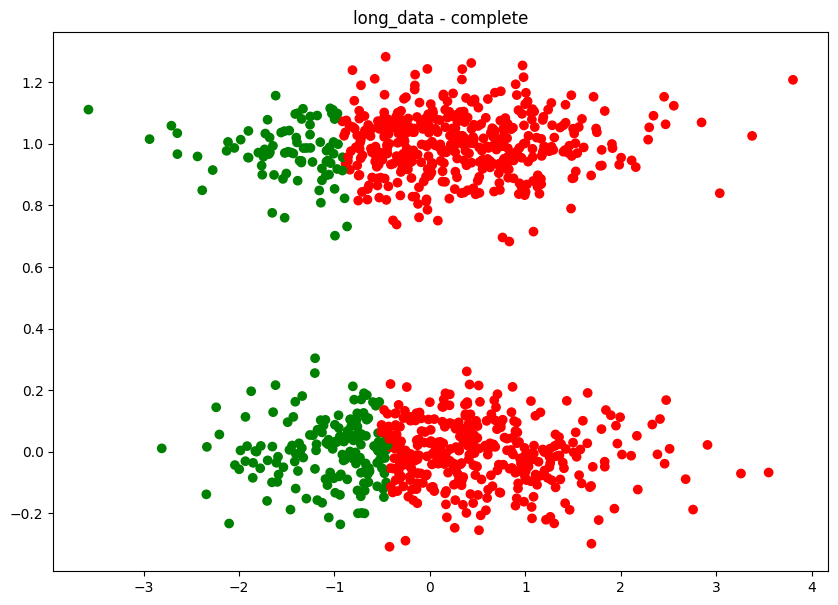

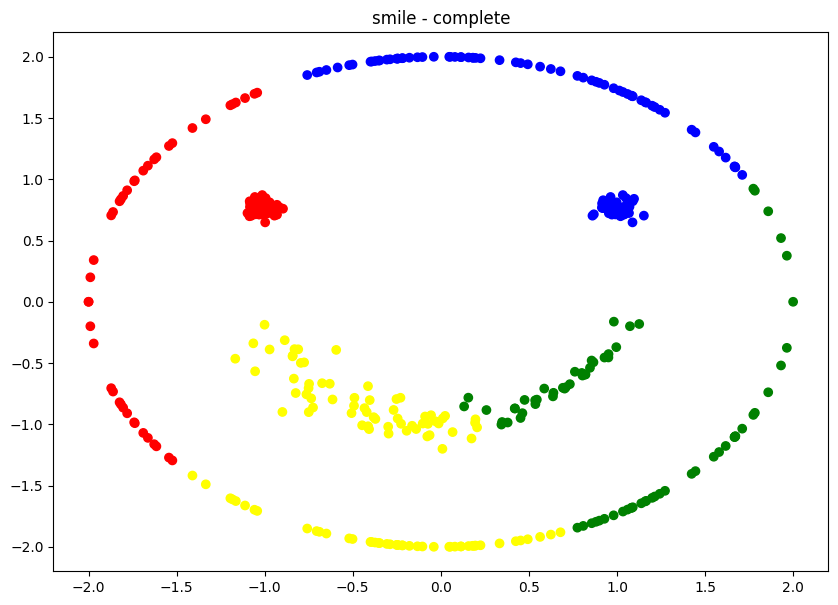

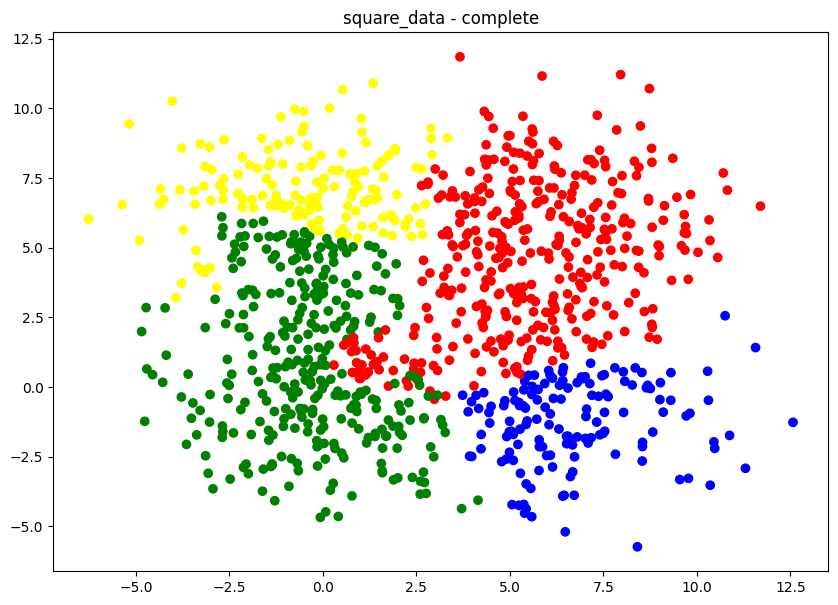

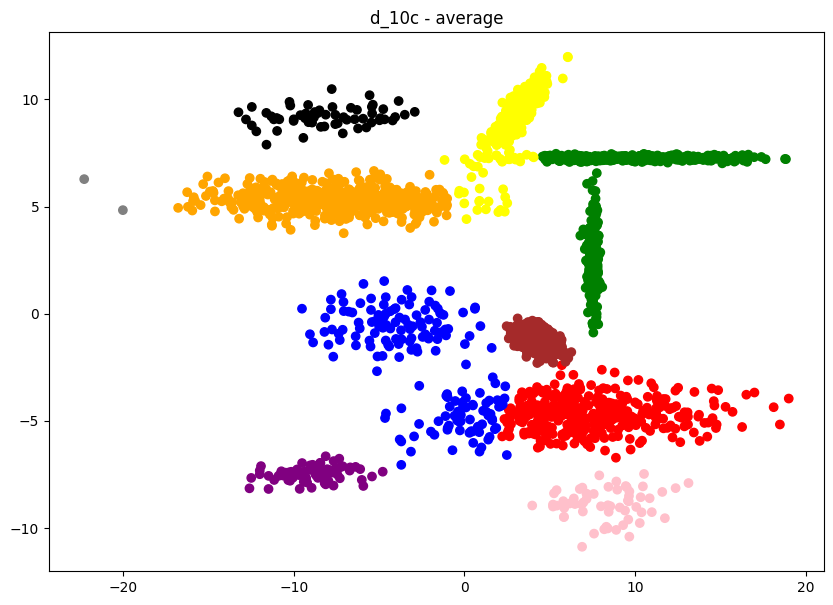

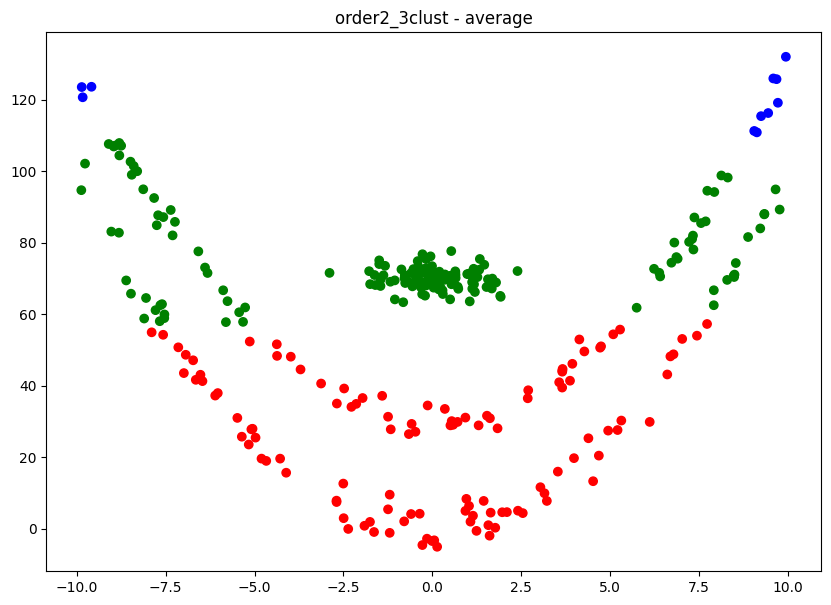

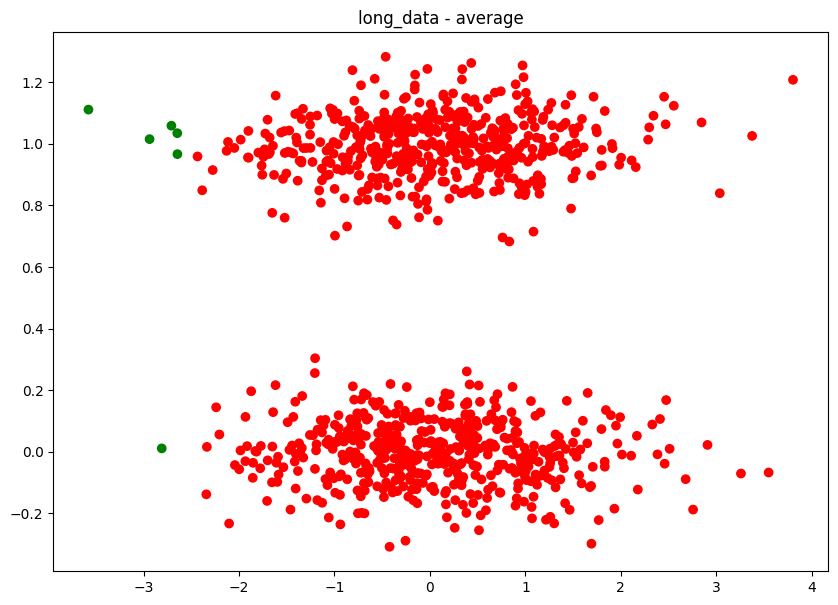

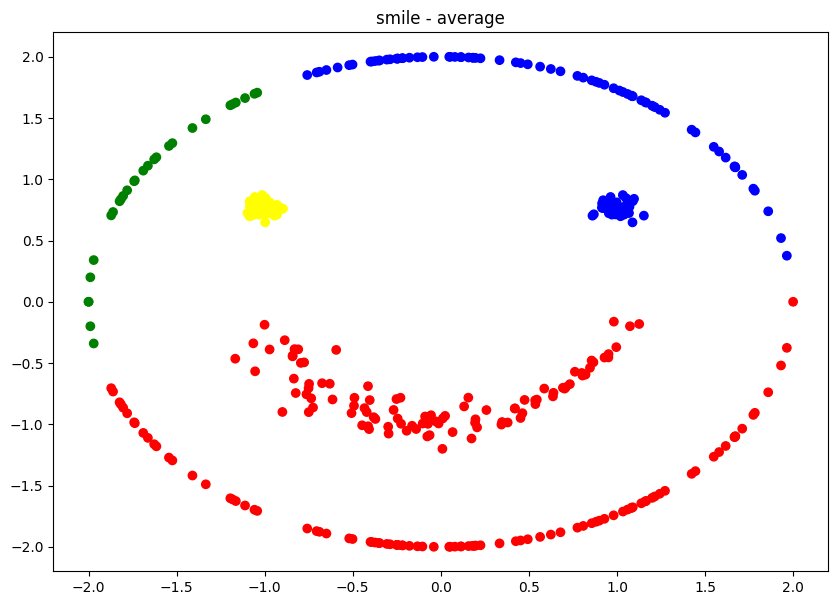

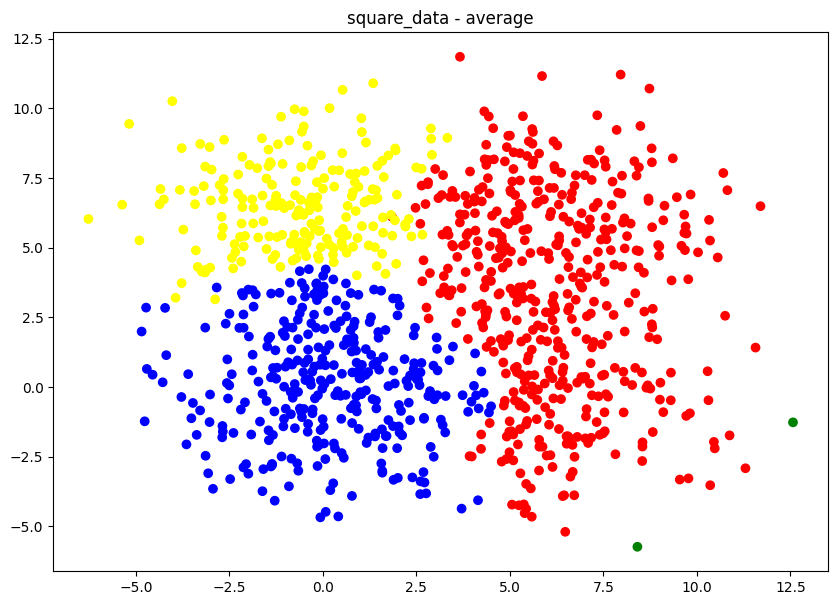

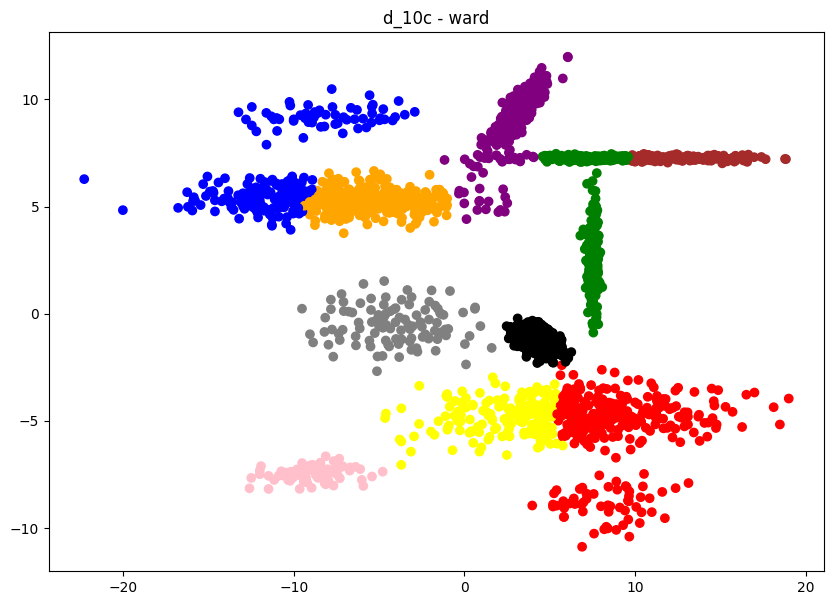

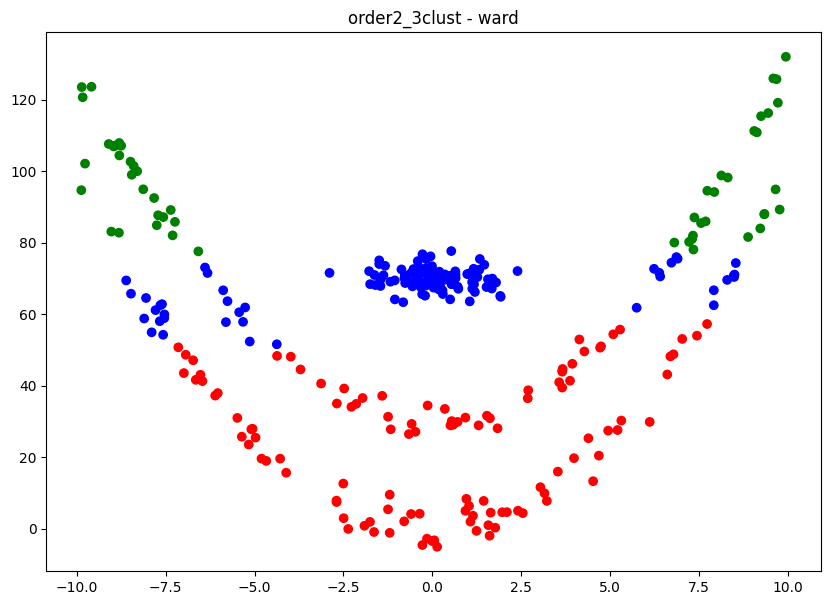

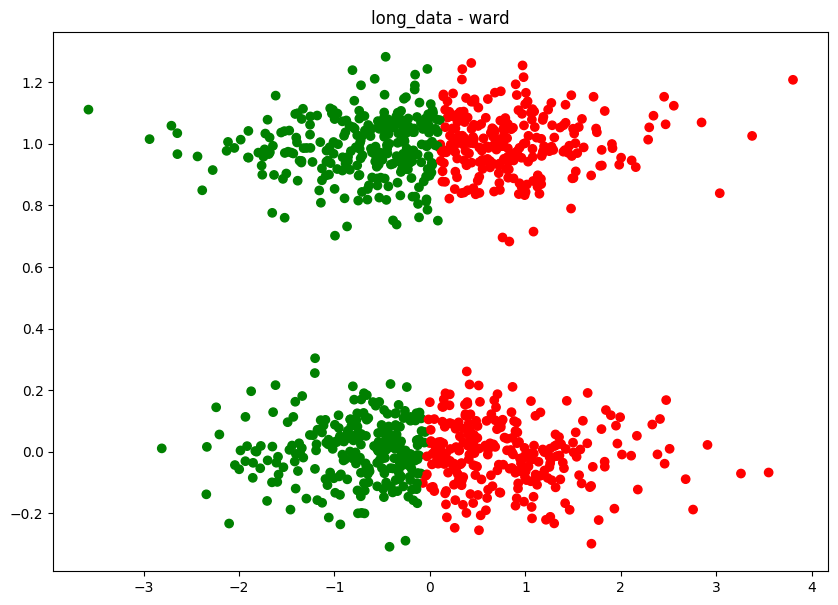

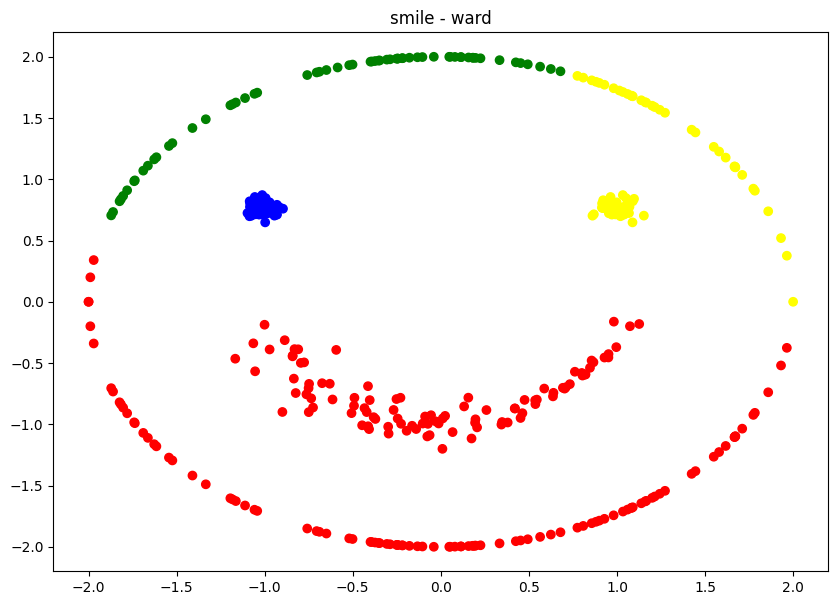

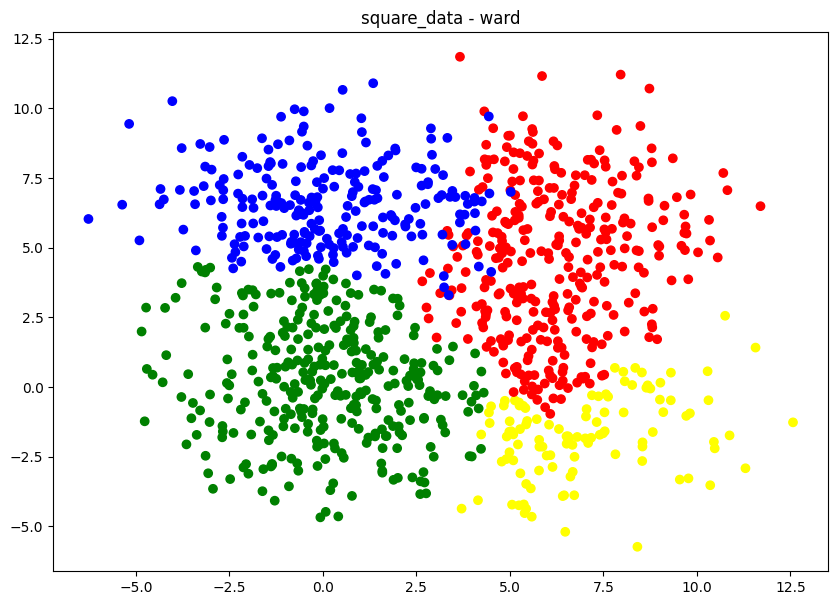

In [102]:
# Visualize the clusters
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'gray', 'black']

for method in ["single", "complete", "average", "ward"]:
    for key in datasets.keys():
        if key != "iris":
            # scatter the dataset with different colors for each class
            k = len(np.unique(results[key][method]))
            custom_cmap = ListedColormap(colors[:k])
            plt.figure(figsize=(10, 7))
            plt.scatter(datasets[key][0],datasets[key][1], c=results[key][method], cmap=custom_cmap)
            plt.title(f"{key} - {method}")
            plt.show()

Create data frame with cluster methods

In [119]:
# Calculate Adjusted Rand Index
dataframe = pd.DataFrame(columns=["single", "average", "complete", "ward"], index=datasets.keys())

for key in datasets:
    values = [adjusted_rand_score(datasets[key][2], results[key][method]) for method in ["single", "complete", "average", "ward"]]
    # print(values)
    dataframe.loc[key] = values
        

d:\ProgramData\Anaconda3\envs\DataMining\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
d:\ProgramData\Anaconda3\envs\DataMining\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
d:\ProgramData\Anaconda3\envs\DataMining\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
d:\ProgramData\Anaconda3\envs\DataMining\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label,

Results for linkage method: single, complete, average, ward

In [120]:
dataframe

single   average  complete      ward
d_10c          0.775182  0.472024  0.843442  0.718511
order2_3clust  0.003978   0.30748  0.250068  0.383567
iris           0.113692  0.107302  0.117332  0.113692
long_data           1.0   0.02178   0.00004  0.000155
smile               1.0  0.195841  0.297363  0.324166
square_data    0.000001  0.459668  0.519651  0.563555

# DBSCAN

In [90]:
# apply dbscan
from sklearn.cluster import DBSCAN

# Grid search pentru epsilon
dbscan_results = {}

epsilons = {}

for key in datasets:
    X = datasets[key]
    normalized_X = (X - X.mean()) / X.std()
    
    db = DBSCAN(eps=0.5, min_samples=5)
    db = db.fit(normalized_X)

    n_clusters = len(np.unique(db.labels_))
    print(key, n_clusters)

    dbscan_results[key] = db.labels_

d_10c 2
order2_3clust 2
iris 3
long_data 3
smile 4
square_data 2


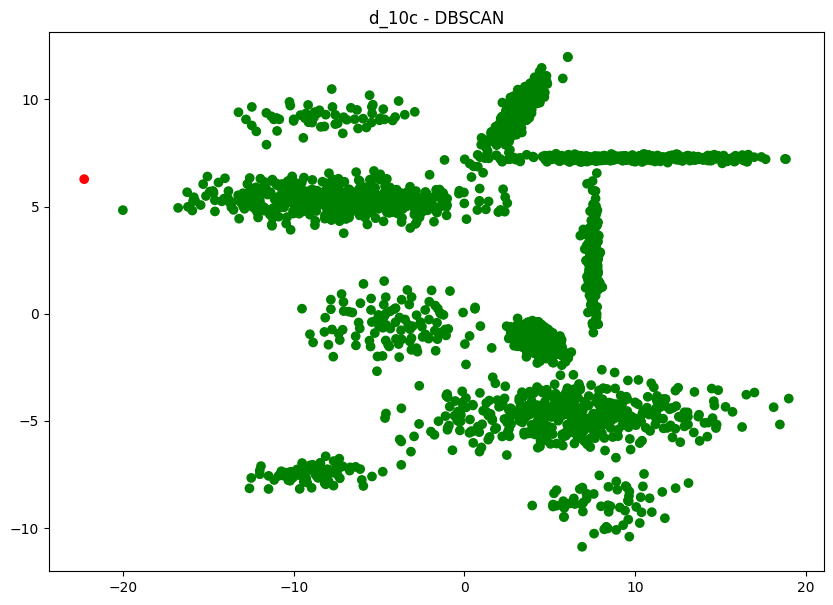

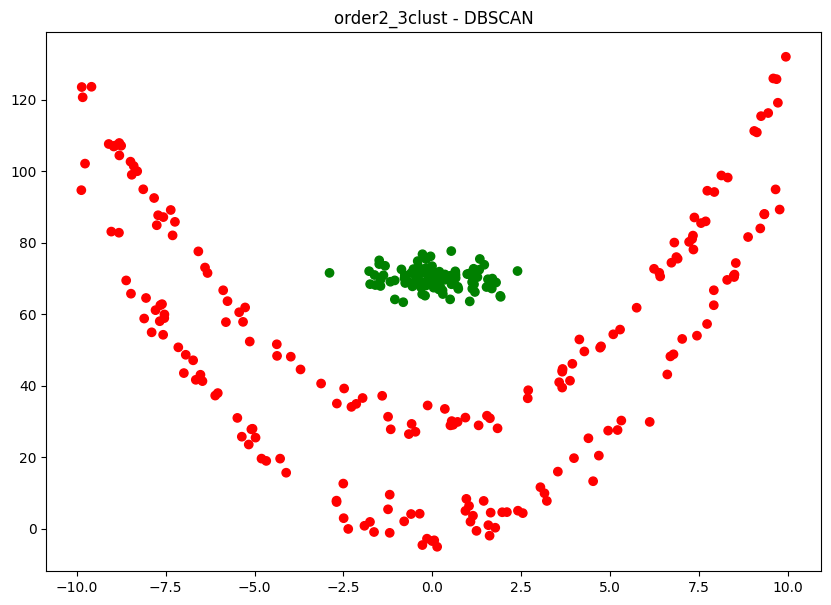

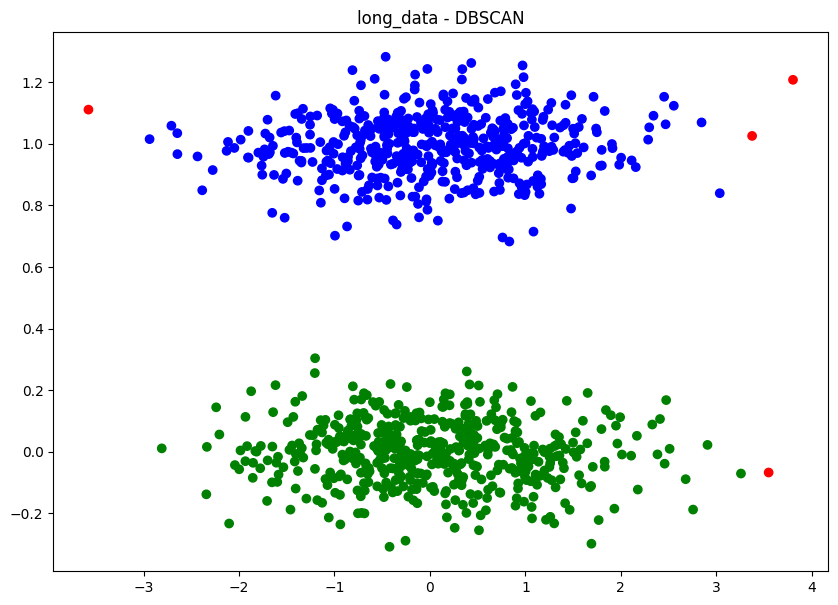

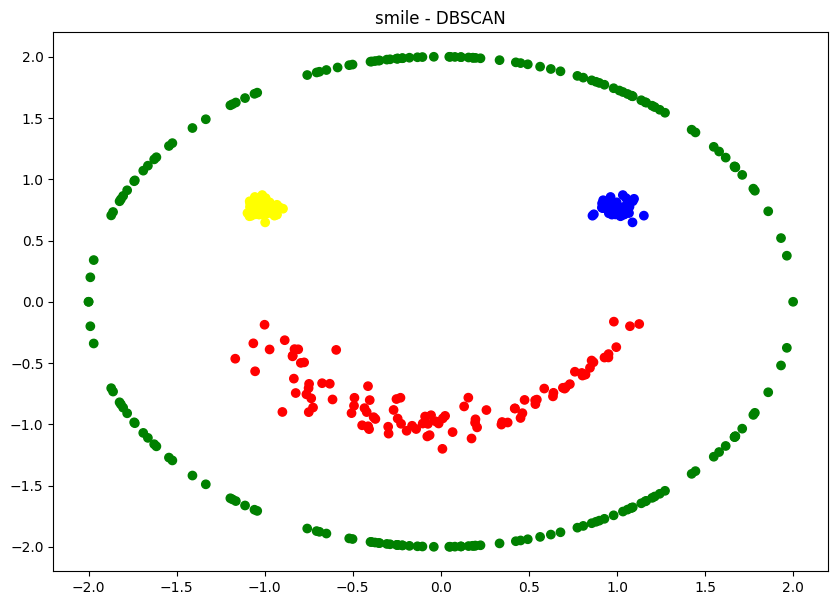

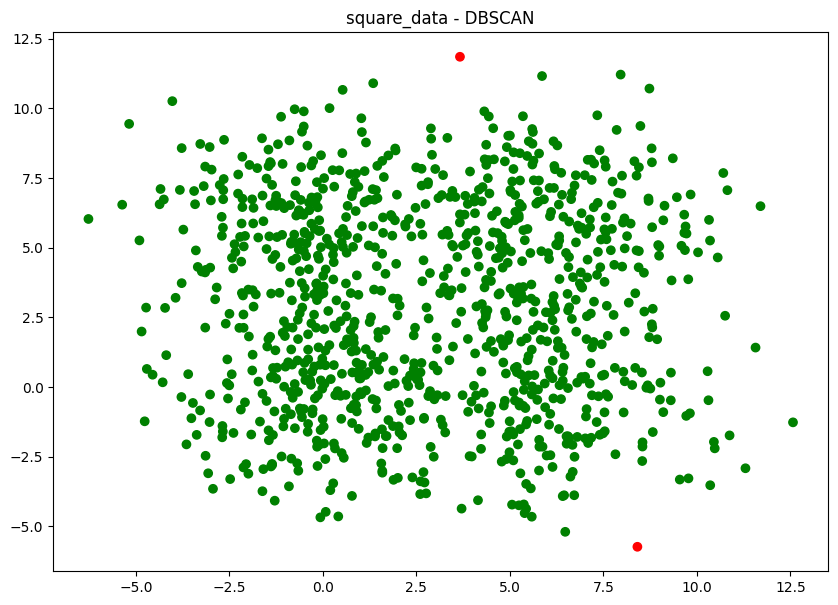

In [89]:
# Visualize the clusters
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'gray', 'black']

for key in datasets.keys():
    if key != "iris":
        # scatter the dataset with different colors for each class
        k = len(np.unique(dbscan_results[key]))
        custom_cmap = ListedColormap(colors[:k])
        plt.figure(figsize=(10, 7))
        plt.scatter(datasets[key][0],datasets[key][1], c=dbscan_results[key], cmap=custom_cmap)
        plt.title(f"{key} - DBSCAN")
        plt.show()

# k-Means

In [44]:
# apply kmeans
from sklearn.cluster import KMeans

kmeans_results = {}

for key in datasets:
    X = datasets[key] 
    kmeans = max([KMeans(n_init='auto',n_clusters=classes[key]).fit(X) for i in range(10)], key=lambda x :adjusted_rand_score(datasets_classes[key], x.labels_ ))
    kmeans = KMeans(n_init='auto',n_clusters=classes[key]).fit(X)
    clusters = kmeans.labels_
    kmeans_results[key] = clusters

    

d:\ProgramData\Anaconda3\envs\DataMining\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\ProgramData\Anaconda3\envs\DataMining\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\ProgramData\Anaconda3\envs\DataMining\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\ProgramData\Anaconda3\envs\DataMining\lib\site-packages\sklearn\cluster\_kmeans.py:13

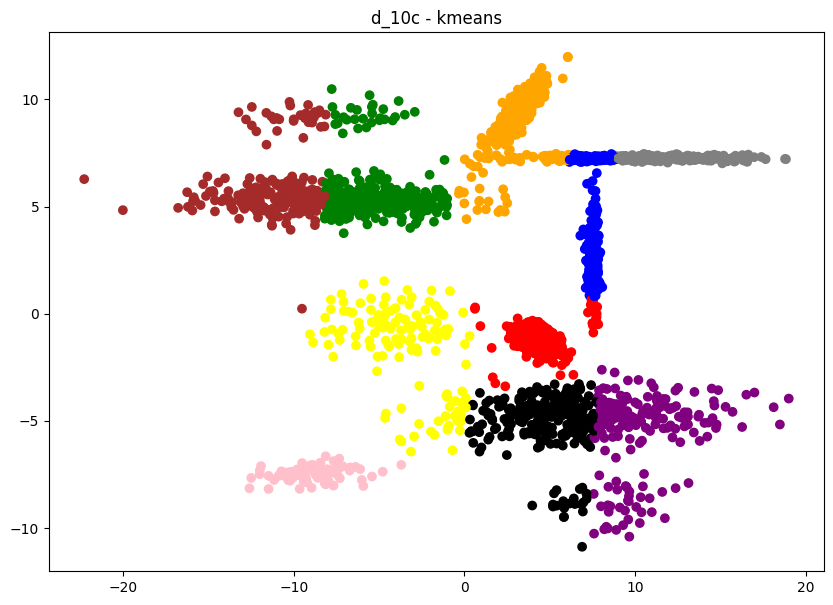

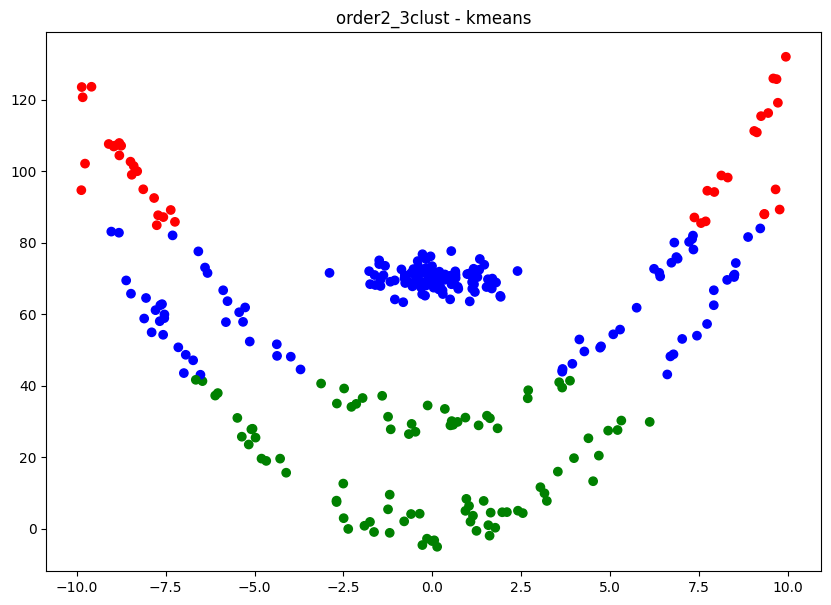

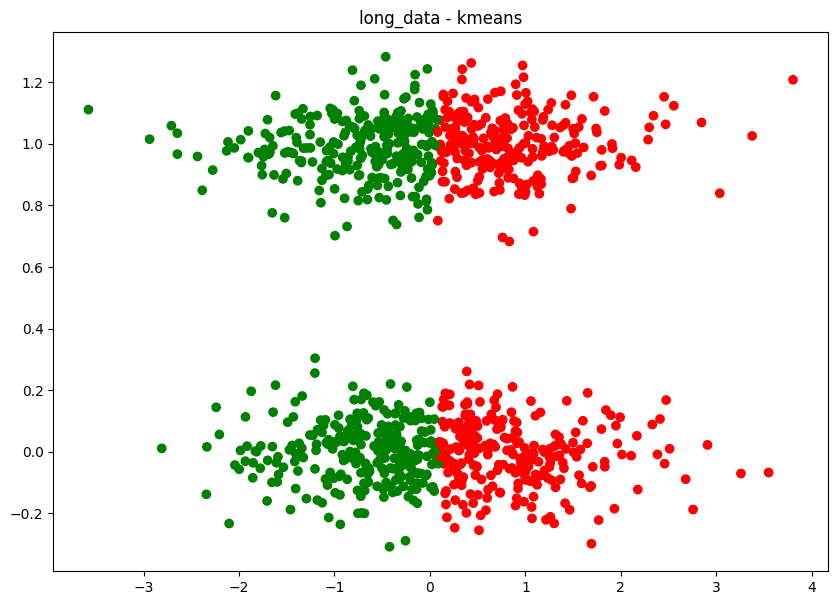

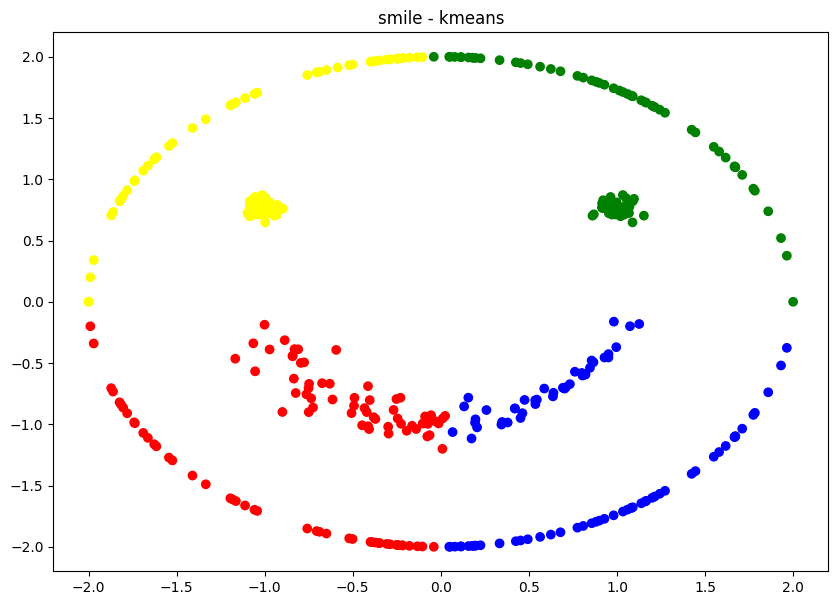

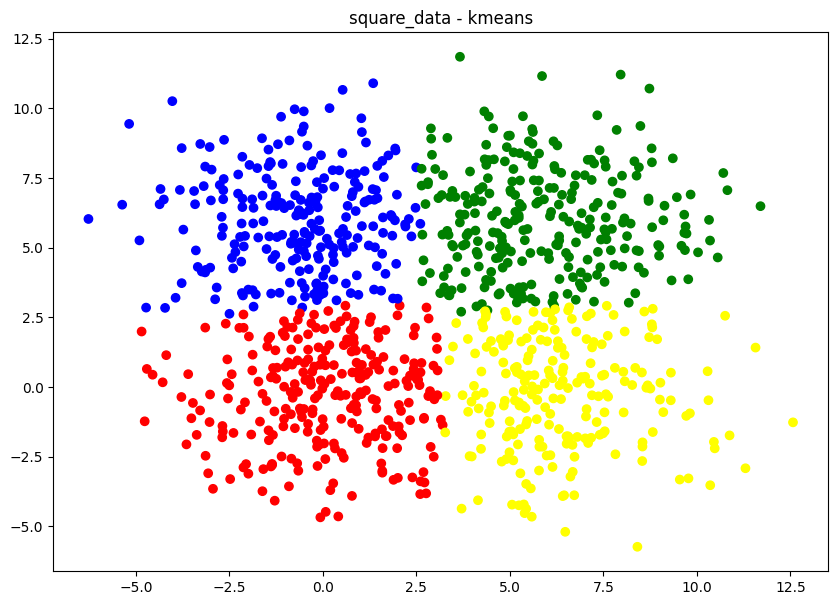

In [47]:
# Visualize the clusters
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'gray', 'black']

for key in datasets.keys():
    if key != "iris":
        # scatter the dataset with different colors for each class
        k = len(np.unique(kmeans_results[key]))
        custom_cmap = ListedColormap(colors[:k])
        plt.figure(figsize=(10, 7))
        plt.scatter(datasets[key][0],datasets[key][1], c=kmeans_results[key], cmap=custom_cmap)
        plt.title(f"{key} - kmeans")
        plt.show()

Create dataframe for kmeans results

In [48]:

dataframe = pd.DataFrame(columns=["kmeans"], index=datasets.keys())

for key in datasets:
    values = [adjusted_rand_score(datasets_classes[key], kmeans_results[key])]
    # print(values)
    dataframe.loc[key] = values
        

Results for kMeans are shown below:

In [49]:
dataframe

kmeans
d_10c          0.678021
order2_3clust  0.242237
iris           0.730238
long_data     -0.000744
smile          0.185372
square_data    0.693293

# Expectation Maximization (EM) clustering

In [50]:
# apply EM clustering
from sklearn.mixture import GaussianMixture

em_results = {}

for key in datasets:
    X = datasets[key] 
    gmm = GaussianMixture(n_components=classes[key]).fit(X)
    clusters = gmm.predict(X)
    em_results[key] = clusters
    

d:\ProgramData\Anaconda3\envs\DataMining\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\ProgramData\Anaconda3\envs\DataMining\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\ProgramData\Anaconda3\envs\DataMining\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
d:\ProgramData\Anaconda3\envs\DataMining\lib\site-packages\sklearn\cluster\_kmeans.py:13

In [51]:

dataframe = pd.DataFrame(columns=["emmixture"], index=datasets.keys())

for key in datasets:
    values = [adjusted_rand_score(datasets_classes[key], em_results[key])]
    # print(values)
    dataframe.loc[key] = values
        

Results for EM clustering are shown below:

In [52]:
dataframe

emmixture
d_10c          0.866059
order2_3clust  0.380882
iris           0.903874
long_data      0.015402
smile          0.192931
square_data    0.675488

# Self - organizing maps (SOM)

In [190]:
X = datasets["iris"].to_numpy()[:, :-1]
X.shape

(150, 4)

In [98]:
from sklearn_som.som import SOM
som_results = {}

#vizualizat gridul

for key in datasets:
    X = datasets[key].to_numpy()
    som = SOM(m=classes[key], n=5, dim=10, max_iter=10000, sigma=1)
    som.fit(X)
    clusters = som.predict(X)
    som_results[key] = clusters



ValueError: operands could not be broadcast together with shapes (50,2) (50,10) 

In [95]:
dataframe = pd.DataFrame(columns=["somn"], index=datasets.keys())

for key in datasets:
    values = [adjusted_rand_score(datasets_classes[key], som_results[key])]
    # print(values)
    dataframe.loc[key] = values 
        

Results for Self - organizing maps (SOM) are shown in the next section.

In [96]:
dataframe

somn
d_10c          0.133167
order2_3clust  0.088845
iris           0.285216
long_data     -0.000749
smile          0.117971
square_data    0.094711